In [2]:
import os
import pandas as pd
import plotly.express as px
import progressbar
import json
import numpy as np

## Get the paths and build table names for iteration

In [3]:
data_path = '../src/data'
mapping_corpus_path = data_path + r'/product/lspc2020_to_tablecorpus'
mapping_corpus_path_2 = data_path + r'/product/lspc2020_to_tablecorpus/Cleaned'
table_corpus_path = data_path + r'/product/product_top100/cleaned'
table_corpus_path_with_id = data_path + r'/product/product_top100/cleaned/with_id'
table_corpus_path2 = data_path + r'/product/product_minimum3/cleaned/with_id'
mapping_corpus_path_all = data_path + r'/product/lspcV2020'

In [13]:
zip_files_mapping = [file for file in os.listdir(mapping_corpus_path_2) if file.endswith('.json.gz')]
zip_files_tables = [file for file in os.listdir(table_corpus_path) if file.endswith('.json.gz')]

In [ ]:
# count = 0
# count_1=0
# with progressbar.ProgressBar(max_value=len(zip_files_tables)) as bar:
#     for zip_file in zip_files_tables:
#         print('/{}'.format(zip_file))
#         df = pd.read_json(table_corpus_path + '/{}'.format(zip_file), compression='gzip', lines=True)     
#         df['cluster_id']=0
#         for zip_file_map in zip_files_mapping:
#             count_1=count_1+1
#             print(count_1)
#             df_map = pd.read_json(mapping_corpus_path_2 + '/{}'.format(zip_file_map), compression='gzip', lines=True)
#             for i in range(len(df_map)):
#                 if df_map['table_id'][i]=='{}'.format(zip_file):
#                   index_map=df_map['row_id'][i]
#                   if df.index[df['row_id'] == index_map].size != 0:
#                     index_table=df.index[df['row_id'] == index_map][0]
#                     if df['cluster_id'][index_table]==0:
#                         df['cluster_id'][index_table]=df_map['cluster_id'][i] 
#                     else:
#                         print('double product value in table')
#         df.to_json(table_corpus_path_with_id + '/{}'.format(zip_file), compression='gzip', orient='records', lines=True)
#         df
#         count += 1
#         bar.update(count)

In [ ]:
# count = 0
# count_1=0
# with progressbar.ProgressBar(max_value=len(zip_files_tables)) as bar:
#     for zip_file in zip_files_tables:
#         print('/{}'.format(zip_file))
#         df = pd.read_json(table_corpus_path2 + '/{}'.format(zip_file), compression='gzip', lines=True)     
#         df['cluster_id']=0
#         for zip_file_map in zip_files_mapping:
#             count_1=count_1+1
#             print(count_1)
#             df_map = pd.read_json(mapping_corpus_path_2 + '/{}'.format(zip_file_map), compression='gzip', lines=True)
#             for i in range(len(df_map)):
#                 if df_map['table_id'][i]=='{}'.format(zip_file):
#                   index_map=df_map['row_id'][i]
#                   if df.index[df['row_id'] == index_map].size != 0:
#                     index_table=df.index[df['row_id'] == index_map][0]
#                     if df['cluster_id'][index_table]==0:
#                         df['cluster_id'][index_table]=df_map['cluster_id'][i] 
#                     else:
#                         print('double product value in table')
#         df.to_json(table_corpus_path2_with_id + '/{}'.format(zip_file), compression='gzip', orient='records', lines=True)
#         df
#         count += 1
#         bar.update(count)

## Only use first cleaning step on cluster_id tables

#### Matching the cluster_ids to the entity tables Top100 did not result in good clusters, as the Top100 seem to be pretty specific regarding their input, e.g., amazonaws with aws-ids as products -> no matches somewhere else

In [11]:
# Use the 4 endings to search for english websites and then only keep these to get valid cluster_ids
def clean_table(df):
  valid_tld = ['.com', '.net', '.org', '.uk']
  df['Valid']=0
  for i in range(len(df)):
    #print(i)
    for tld in valid_tld:
      if tld in df['table_id'][i]:
        df['Valid'][i]=1
  return df[df['Valid']==1]

In [10]:
# #clean mapping files and save them again
# # then use the cleaned tables to append into a series and the get a dataframe from that
# count = 0
# count_1=0
# data=[]
# with progressbar.ProgressBar(max_value=len(zip_files_mapping)) as bar:
#     for zip_file in zip_files_mapping:
#         print('/{}'.format(zip_file))
#         df = pd.read_json(mapping_corpus_path_2 + '/{}'.format(zip_file), compression='gzip', lines=True)
#         #df=clean_table(df)
#         #df['table_name']='{}'.format(zip_file)
#         #df.to_json(mapping_corpus_path_2 + '/{}'.format(zip_file), compression='gzip', orient='records', lines=True)
#         data.append(df)
#         count += 1
#         bar.update(count)
# #large_df= pd.concat(data, ignore_index=True)
# #large_df.to_json(os.path.join(mapping_corpus_path, 'concatentation'), compression='gzip', orient='records', lines=True)

In [ ]:
# #see the input of the series
# data

### Concat the series into a dataframe and then sort by the cluster_ids to get the table counts for each cluster

In [ ]:
# large_df= pd.concat(data, ignore_index=True)

In [ ]:
#table has around 28 Million valid cluster ids (not necessarily unique)
# large_df

## Filter on cluster_id and table_id to be easily able to count the table_ids per unique cluster

In [4]:
# get dictionaries
data_path_1 = '../src/data/product/lspc2020_to_tablecorpus/Cleaned/allocation_amount_only_total_dict.json'
data_path_2 = '../src/data/product/lspc2020_to_tablecorpus/Cleaned/allocation_amount_only_set_dict.json'

In [5]:
with open(data_path_1) as f:
    data_1=json.load(f)
with open(data_path_2) as f:
    data_2=json.load(f)

In [7]:
df_total=pd.DataFrame.from_dict(data_1, orient='index')
df_total

,0
73924608,1
31326208,1
22544400,1
51904529,1
74055698,1
...,...
14680043,1
6553589,1
20709366,1
75628536,1


In [8]:
df_set=pd.DataFrame.from_dict(data_2, orient='index')
df_set

,0
73924608,1
31326208,1
22544400,1
51904529,1
74055698,1
...,...
14680043,1
6553589,1
20709366,1
75628536,1


In [9]:
df_total=df_total.reset_index().rename(columns={0:"Amount",'index':"cluster_id"})
df_set=df_set.reset_index().rename(columns={0:"Amount",'index':"cluster_id"})

In [10]:
df_set.max()

index     9999996
Amount       1285
dtype: object

In [11]:
df_total.max()

index     9999996
Amount       2600
dtype: object

In [12]:
# We discard all clusters with less than 2 entries, cause we cannot match anything there, so 1,6 million clusters remain
df_set=df_set[df_set['Amount']>1]
df_set

,index,Amount
5,131092,29
9,4980762,4
25,17694777,2
27,2490427,9
28,4980796,2
...,...,...
20852522,55847403,2
20887842,2436046,2
20892455,740855,2
20900059,2721215,2


In [13]:
df_set.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,1244562.0,4.0,11.0,2.0,2.0,2.0,3.0,1285.0


<AxesSubplot:ylabel='Frequency'>

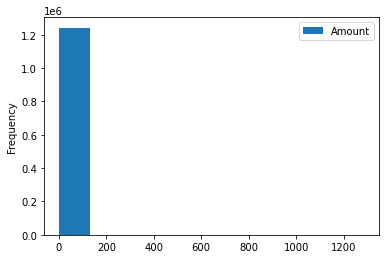

In [16]:
df_set.plot(x='cluster_id',y='Amount',kind='hist')

In [17]:
# filter on clusters with more entries to get information, here are still 20k clusters left
df_15=df_set[df_set['Amount']>15]
df_15

,cluster_id,Amount
5,131092,29
30,47710279,42
201,2621903,33
642,787983,18
646,1050139,16
...,...,...
8306446,65770080,17
8780123,19170901,17
9040570,58582000,16
9429552,19412215,17


In [19]:
df_15.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,19367.0,59.0,69.0,16.0,22.0,33.0,63.0,1285.0


<AxesSubplot:ylabel='Frequency'>

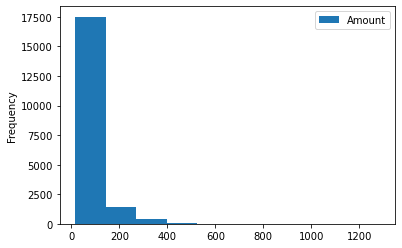

In [20]:
df_15.plot(x='cluster_id',y='Amount',kind='hist')

In [21]:
# filter on clusters with more entries to get information, here are still 20k clusters left
df_150=df_set[df_set['Amount']>150]
df_150

,cluster_id,Amount
696,63047326,158
729,26085086,162
1001,59902335,185
1406,47320529,156
1584,24252278,176
...,...,...
1082271,5388699,172
1093363,63881368,174
1192604,40071639,154
1198138,72856662,202


In [22]:
df_150.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,1608.0,242.0,99.0,151.0,171.0,205.0,280.0,1285.0


<AxesSubplot:ylabel='Frequency'>

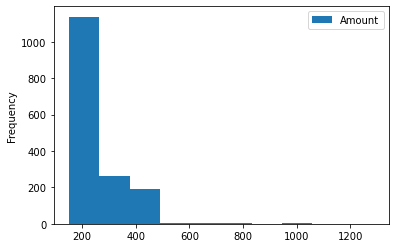

In [23]:
df_150.plot(x='cluster_id',y='Amount',kind='hist')

In [25]:
df_15_500=df_15[df_15['Amount']<500]

<AxesSubplot:ylabel='Frequency'>

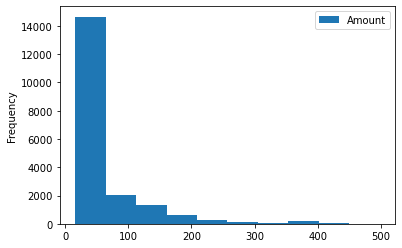

In [27]:
df_15_500.plot(x='cluster_id',y='Amount',kind='hist')

## Match the number dictionaries with the information about the brand

In [4]:
# get dictionaries
electronics_path = '../src/data/product/product_electronics_v2/electronics_dict.json'
clothes_path = '../src/data/product/product_clothes_v2/clothes_dict.json'
mapping_corpus_path_2 = '../src/data/product/lspc2020_to_tablecorpus/Cleaned'

In [5]:
with open(electronics_path) as f:
    electronics_data=json.load(f)

In [6]:
with open(clothes_path) as f:
    clothes_data=json.load(f)

In [7]:
#clean the dictionaries by getting rid of the first key 
cleaned_dictionary_electronics={}
for value in electronics_data.values():
    cleaned_dictionary_electronics.update(value)

In [8]:
#clean the dictionaries by getting rid of the first key 
cleaned_dictionary_clothes={}
for value in clothes_data.values():
    cleaned_dictionary_clothes.update(value)

In [9]:
#put the dictionaries into dataframes 
df_electronics=pd.DataFrame.from_dict(cleaned_dictionary_electronics, orient='index')
df_clothes=pd.DataFrame.from_dict(cleaned_dictionary_clothes, orient='index')

In [10]:
#compare column names of table before and after dropping to actually get a feeling for the best products
electronics_before_cleaning = df_electronics.index.tolist()
#drop empty rows
df_electronics.dropna(how='all', inplace=True)
electronics_after_cleaning = df_electronics.index.tolist()
list(set(electronics_before_cleaning) - set(electronics_after_cleaning))

[]

In [11]:
# get information about top 20 electronic brands by hard coding to find rows with most column content
dataframe = pd.isna(df_electronics[82])
newlist = dataframe[dataframe==False].index.tolist()
newlist
#get information about which brands to be dropped, as otherwise running time of code would be too high
list(set(electronics_after_cleaning) - set(newlist))

['resonant']

In [12]:
# get information about top 20 clothes brands by hard coding to find rows with most column content
clothes_before_cleaning = df_clothes.index.tolist()
dataframe = pd.isna(df_clothes[150])
new_list_clothes = dataframe[dataframe==False].index.tolist()
new_list_clothes
#get information about which brands to be dropped, as otherwise running time of code would be too high
list(set(clothes_before_cleaning) - set(new_list_clothes))

[]

In [14]:
# use the cleaned tables to append into a series and the get a dataframe from that with the remaining cluster ids
count = 0
data=[]
with progressbar.ProgressBar(max_value=len(zip_files_mapping)) as bar:
    for zip_file in zip_files_mapping:
        print('/{}'.format(zip_file))
        df = pd.read_json(mapping_corpus_path_2 + '/{}'.format(zip_file), compression='gzip', lines=True)
        data.append(df)
        count += 1
        bar.update(count)
df_large= pd.concat(data, ignore_index=True)
#df.large.to_json(os.path.join(mapping_corpus_path_2, 'concatentation'), compression='gzip', orient='records', lines=True)

/map_to_tables_35.json.gz


  0% (0 of 359) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

/map_to_tables_279.json.gz


  0% (2 of 359) |                        | Elapsed Time: 0:00:00 ETA:   0:02:10

/map_to_tables_223.json.gz


  0% (3 of 359) |                        | Elapsed Time: 0:00:01 ETA:   0:02:15

/map_to_tables_182.json.gz


  1% (4 of 359) |                        | Elapsed Time: 0:00:01 ETA:   0:02:52

/map_to_tables_88.json.gz


  1% (5 of 359) |                        | Elapsed Time: 0:00:02 ETA:   0:02:55

/map_to_tables_27.json.gz


  1% (6 of 359) |                        | Elapsed Time: 0:00:02 ETA:   0:03:17

/map_to_tables_166.json.gz


  1% (7 of 359) |                        | Elapsed Time: 0:00:03 ETA:   0:03:21

/map_to_tables_321.json.gz


  2% (8 of 359) |                        | Elapsed Time: 0:00:03 ETA:   0:03:05

/map_to_tables_334.json.gz


  2% (9 of 359) |                        | Elapsed Time: 0:00:04 ETA:   0:02:53

/map_to_tables_211.json.gz


  2% (10 of 359) |                       | Elapsed Time: 0:00:04 ETA:   0:02:41

/map_to_tables_121.json.gz


  3% (11 of 359) |                       | Elapsed Time: 0:00:05 ETA:   0:02:33

/map_to_tables_104.json.gz


  3% (12 of 359) |                       | Elapsed Time: 0:00:05 ETA:   0:02:24

/map_to_tables_225.json.gz


  3% (13 of 359) |                       | Elapsed Time: 0:00:05 ETA:   0:02:27

/map_to_tables_76.json.gz


  3% (14 of 359) |                       | Elapsed Time: 0:00:06 ETA:   0:02:31

/map_to_tables_150.json.gz


  4% (15 of 359) |                       | Elapsed Time: 0:00:06 ETA:   0:02:15

/map_to_tables_160.json.gz


  4% (16 of 359) |#                      | Elapsed Time: 0:00:07 ETA:   0:02:15

/map_to_tables_136.json.gz


  4% (17 of 359) |#                      | Elapsed Time: 0:00:07 ETA:   0:02:16

/map_to_tables_254.json.gz


  5% (18 of 359) |#                      | Elapsed Time: 0:00:08 ETA:   0:02:33

/map_to_tables_128.json.gz


  5% (19 of 359) |#                      | Elapsed Time: 0:00:08 ETA:   0:02:50

/map_to_tables_147.json.gz


  5% (20 of 359) |#                      | Elapsed Time: 0:00:09 ETA:   0:03:09

/map_to_tables_188.json.gz


  5% (21 of 359) |#                      | Elapsed Time: 0:00:10 ETA:   0:03:37

/map_to_tables_24.json.gz


  6% (22 of 359) |#                      | Elapsed Time: 0:00:10 ETA:   0:03:36

/map_to_tables_41.json.gz


  6% (23 of 359) |#                      | Elapsed Time: 0:00:11 ETA:   0:03:19

/map_to_tables_165.json.gz


  6% (24 of 359) |#                      | Elapsed Time: 0:00:11 ETA:   0:03:13

/map_to_tables_43.json.gz


  6% (25 of 359) |#                      | Elapsed Time: 0:00:12 ETA:   0:02:56

/map_to_tables_174.json.gz


  7% (26 of 359) |#                      | Elapsed Time: 0:00:12 ETA:   0:02:36

/map_to_tables_288.json.gz


  7% (27 of 359) |#                      | Elapsed Time: 0:00:12 ETA:   0:02:17

/map_to_tables_261.json.gz


  7% (28 of 359) |#                      | Elapsed Time: 0:00:13 ETA:   0:02:30

/map_to_tables_33.json.gz


  8% (29 of 359) |#                      | Elapsed Time: 0:00:14 ETA:   0:02:50

/map_to_tables_197.json.gz


  8% (30 of 359) |#                      | Elapsed Time: 0:00:14 ETA:   0:02:46

/map_to_tables_291.json.gz


  8% (31 of 359) |#                      | Elapsed Time: 0:00:14 ETA:   0:02:47

/map_to_tables_155.json.gz


  8% (32 of 359) |##                     | Elapsed Time: 0:00:15 ETA:   0:02:47

/map_to_tables_149.json.gz


  9% (33 of 359) |##                     | Elapsed Time: 0:00:16 ETA:   0:02:43

/map_to_tables_186.json.gz


  9% (34 of 359) |##                     | Elapsed Time: 0:00:16 ETA:   0:02:42

/map_to_tables_183.json.gz


  9% (35 of 359) |##                     | Elapsed Time: 0:00:17 ETA:   0:03:04

/map_to_tables_153.json.gz


 10% (36 of 359) |##                     | Elapsed Time: 0:00:17 ETA:   0:03:01

/map_to_tables_168.json.gz


 10% (37 of 359) |##                     | Elapsed Time: 0:00:18 ETA:   0:03:02

/map_to_tables_18.json.gz


 10% (38 of 359) |##                     | Elapsed Time: 0:00:19 ETA:   0:03:23

/map_to_tables_343.json.gz


 10% (39 of 359) |##                     | Elapsed Time: 0:00:19 ETA:   0:03:20

/map_to_tables_355.json.gz


 11% (40 of 359) |##                     | Elapsed Time: 0:00:19 ETA:   0:02:58

/map_to_tables_270.json.gz


 11% (41 of 359) |##                     | Elapsed Time: 0:00:20 ETA:   0:02:55

/map_to_tables_130.json.gz


 11% (42 of 359) |##                     | Elapsed Time: 0:00:21 ETA:   0:02:41

/map_to_tables_98.json.gz


 11% (43 of 359) |##                     | Elapsed Time: 0:00:21 ETA:   0:02:30

/map_to_tables_55.json.gz


 12% (44 of 359) |##                     | Elapsed Time: 0:00:21 ETA:   0:02:14

/map_to_tables_306.json.gz


 12% (45 of 359) |##                     | Elapsed Time: 0:00:22 ETA:   0:02:14

/map_to_tables_207.json.gz


 12% (46 of 359) |##                     | Elapsed Time: 0:00:22 ETA:   0:02:15

/map_to_tables_77.json.gz


 13% (47 of 359) |###                    | Elapsed Time: 0:00:23 ETA:   0:02:09

/map_to_tables_212.json.gz


 13% (48 of 359) |###                    | Elapsed Time: 0:00:23 ETA:   0:02:10

/map_to_tables_92.json.gz


 13% (49 of 359) |###                    | Elapsed Time: 0:00:23 ETA:   0:02:08

/map_to_tables_352.json.gz


 13% (50 of 359) |###                    | Elapsed Time: 0:00:24 ETA:   0:02:25

/map_to_tables_69.json.gz


 14% (51 of 359) |###                    | Elapsed Time: 0:00:24 ETA:   0:02:08

/map_to_tables_213.json.gz


 14% (52 of 359) |###                    | Elapsed Time: 0:00:25 ETA:   0:02:24

/map_to_tables_79.json.gz


 14% (53 of 359) |###                    | Elapsed Time: 0:00:25 ETA:   0:02:33

/map_to_tables_287.json.gz


 15% (54 of 359) |###                    | Elapsed Time: 0:00:26 ETA:   0:02:23

/map_to_tables_269.json.gz


 15% (55 of 359) |###                    | Elapsed Time: 0:00:26 ETA:   0:02:22

/map_to_tables_313.json.gz


 15% (56 of 359) |###                    | Elapsed Time: 0:00:27 ETA:   0:02:35

/map_to_tables_286.json.gz


 15% (57 of 359) |###                    | Elapsed Time: 0:00:27 ETA:   0:02:34

/map_to_tables_132.json.gz


 16% (58 of 359) |###                    | Elapsed Time: 0:00:28 ETA:   0:02:33

/map_to_tables_200.json.gz


 16% (59 of 359) |###                    | Elapsed Time: 0:00:28 ETA:   0:02:24

/map_to_tables_323.json.gz


 16% (60 of 359) |###                    | Elapsed Time: 0:00:29 ETA:   0:02:18

/map_to_tables_102.json.gz


 16% (61 of 359) |###                    | Elapsed Time: 0:00:29 ETA:   0:02:14

/map_to_tables_161.json.gz


 17% (62 of 359) |###                    | Elapsed Time: 0:00:30 ETA:   0:02:08

/map_to_tables_5.json.gz


 17% (63 of 359) |####                   | Elapsed Time: 0:00:30 ETA:   0:02:08

/map_to_tables_278.json.gz


 17% (64 of 359) |####                   | Elapsed Time: 0:00:31 ETA:   0:02:24

/map_to_tables_325.json.gz


 18% (65 of 359) |####                   | Elapsed Time: 0:00:31 ETA:   0:02:14

/map_to_tables_96.json.gz


 18% (66 of 359) |####                   | Elapsed Time: 0:00:31 ETA:   0:02:11

/map_to_tables_297.json.gz


 18% (67 of 359) |####                   | Elapsed Time: 0:00:32 ETA:   0:02:29

/map_to_tables_53.json.gz


 18% (68 of 359) |####                   | Elapsed Time: 0:00:32 ETA:   0:02:21

/map_to_tables_218.json.gz


 19% (69 of 359) |####                   | Elapsed Time: 0:00:33 ETA:   0:02:30

/map_to_tables_359.json.gz


 19% (70 of 359) |####                   | Elapsed Time: 0:00:33 ETA:   0:02:30

/map_to_tables_74.json.gz


 19% (71 of 359) |####                   | Elapsed Time: 0:00:34 ETA:   0:02:21

/map_to_tables_342.json.gz


 20% (72 of 359) |####                   | Elapsed Time: 0:00:34 ETA:   0:02:01

/map_to_tables_151.json.gz


 20% (73 of 359) |####                   | Elapsed Time: 0:00:34 ETA:   0:02:00

/map_to_tables_101.json.gz


 20% (74 of 359) |####                   | Elapsed Time: 0:00:35 ETA:   0:01:56

/map_to_tables_241.json.gz


 20% (75 of 359) |####                   | Elapsed Time: 0:00:36 ETA:   0:02:03

/map_to_tables_308.json.gz


 21% (76 of 359) |####                   | Elapsed Time: 0:00:36 ETA:   0:02:25

/map_to_tables_326.json.gz


 21% (77 of 359) |####                   | Elapsed Time: 0:00:37 ETA:   0:02:45

/map_to_tables_158.json.gz


 21% (78 of 359) |####                   | Elapsed Time: 0:00:37 ETA:   0:02:46

/map_to_tables_143.json.gz


 22% (79 of 359) |#####                  | Elapsed Time: 0:00:38 ETA:   0:02:41

/map_to_tables_240.json.gz


 22% (80 of 359) |#####                  | Elapsed Time: 0:00:38 ETA:   0:02:20

/map_to_tables_318.json.gz


 22% (81 of 359) |#####                  | Elapsed Time: 0:00:39 ETA:   0:02:11

/map_to_tables_124.json.gz


 22% (82 of 359) |#####                  | Elapsed Time: 0:00:39 ETA:   0:02:11

/map_to_tables_81.json.gz


 23% (83 of 359) |#####                  | Elapsed Time: 0:00:40 ETA:   0:02:08

/map_to_tables_332.json.gz


 23% (84 of 359) |#####                  | Elapsed Time: 0:00:40 ETA:   0:01:52

/map_to_tables_252.json.gz


 23% (85 of 359) |#####                  | Elapsed Time: 0:00:40 ETA:   0:02:08

/map_to_tables_118.json.gz


 23% (86 of 359) |#####                  | Elapsed Time: 0:00:41 ETA:   0:02:09

/map_to_tables_80.json.gz


 24% (87 of 359) |#####                  | Elapsed Time: 0:00:41 ETA:   0:01:52

/map_to_tables_320.json.gz


 24% (88 of 359) |#####                  | Elapsed Time: 0:00:42 ETA:   0:01:54

/map_to_tables_172.json.gz


 24% (89 of 359) |#####                  | Elapsed Time: 0:00:42 ETA:   0:01:54

/map_to_tables_285.json.gz


 25% (90 of 359) |#####                  | Elapsed Time: 0:00:43 ETA:   0:01:54

/map_to_tables_135.json.gz


 25% (91 of 359) |#####                  | Elapsed Time: 0:00:43 ETA:   0:01:53

/map_to_tables_199.json.gz


 25% (92 of 359) |#####                  | Elapsed Time: 0:00:44 ETA:   0:02:08

/map_to_tables_11.json.gz


 25% (93 of 359) |#####                  | Elapsed Time: 0:00:44 ETA:   0:02:30

/map_to_tables_38.json.gz


 26% (94 of 359) |######                 | Elapsed Time: 0:00:45 ETA:   0:02:30

/map_to_tables_273.json.gz


 26% (95 of 359) |######                 | Elapsed Time: 0:00:45 ETA:   0:02:28

/map_to_tables_47.json.gz


 26% (96 of 359) |######                 | Elapsed Time: 0:00:46 ETA:   0:02:29

/map_to_tables_70.json.gz


 27% (97 of 359) |######                 | Elapsed Time: 0:00:46 ETA:   0:02:11

/map_to_tables_181.json.gz


 27% (98 of 359) |######                 | Elapsed Time: 0:00:47 ETA:   0:02:03

/map_to_tables_202.json.gz


 27% (99 of 359) |######                 | Elapsed Time: 0:00:47 ETA:   0:01:47

/map_to_tables_108.json.gz


 27% (100 of 359) |######                | Elapsed Time: 0:00:47 ETA:   0:01:47

/map_to_tables_8.json.gz


 28% (101 of 359) |######                | Elapsed Time: 0:00:48 ETA:   0:01:45

/map_to_tables_242.json.gz


 28% (102 of 359) |######                | Elapsed Time: 0:00:48 ETA:   0:01:32

/map_to_tables_290.json.gz


 28% (103 of 359) |######                | Elapsed Time: 0:00:48 ETA:   0:01:32

/map_to_tables_239.json.gz


 28% (104 of 359) |######                | Elapsed Time: 0:00:49 ETA:   0:01:46

/map_to_tables_176.json.gz


 29% (105 of 359) |######                | Elapsed Time: 0:00:50 ETA:   0:01:51

/map_to_tables_137.json.gz


 29% (106 of 359) |######                | Elapsed Time: 0:00:50 ETA:   0:01:50

/map_to_tables_303.json.gz


 29% (107 of 359) |######                | Elapsed Time: 0:00:51 ETA:   0:02:14

/map_to_tables_184.json.gz


 30% (108 of 359) |######                | Elapsed Time: 0:00:51 ETA:   0:02:16

/map_to_tables_54.json.gz


 30% (109 of 359) |######                | Elapsed Time: 0:00:52 ETA:   0:02:10

/map_to_tables_51.json.gz


 30% (110 of 359) |######                | Elapsed Time: 0:00:52 ETA:   0:02:08

/map_to_tables_103.json.gz


 30% (111 of 359) |######                | Elapsed Time: 0:00:52 ETA:   0:01:59

/map_to_tables_233.json.gz


 31% (112 of 359) |######                | Elapsed Time: 0:00:53 ETA:   0:01:45

/map_to_tables_316.json.gz


 31% (113 of 359) |######                | Elapsed Time: 0:00:53 ETA:   0:01:43

/map_to_tables_156.json.gz


 31% (114 of 359) |######                | Elapsed Time: 0:00:53 ETA:   0:01:30

/map_to_tables_277.json.gz


 32% (115 of 359) |#######               | Elapsed Time: 0:00:54 ETA:   0:01:28

/map_to_tables_133.json.gz


 32% (116 of 359) |#######               | Elapsed Time: 0:00:54 ETA:   0:01:28

/map_to_tables_255.json.gz


 32% (117 of 359) |#######               | Elapsed Time: 0:00:55 ETA:   0:01:31

/map_to_tables_129.json.gz


 32% (118 of 359) |#######               | Elapsed Time: 0:00:55 ETA:   0:01:30

/map_to_tables_230.json.gz


 33% (119 of 359) |#######               | Elapsed Time: 0:00:55 ETA:   0:01:29

/map_to_tables_191.json.gz


 33% (120 of 359) |#######               | Elapsed Time: 0:00:56 ETA:   0:01:42

/map_to_tables_62.json.gz


 33% (121 of 359) |#######               | Elapsed Time: 0:00:56 ETA:   0:01:42

/map_to_tables_282.json.gz


 33% (122 of 359) |#######               | Elapsed Time: 0:00:57 ETA:   0:01:58

/map_to_tables_15.json.gz


 34% (123 of 359) |#######               | Elapsed Time: 0:00:57 ETA:   0:01:59

/map_to_tables_180.json.gz


 34% (124 of 359) |#######               | Elapsed Time: 0:00:58 ETA:   0:02:00

/map_to_tables_219.json.gz


 35% (126 of 359) |#######               | Elapsed Time: 0:00:59 ETA:   0:01:58

/map_to_tables_263.json.gz
/map_to_tables_144.json.gz


 35% (127 of 359) |#######               | Elapsed Time: 0:00:59 ETA:   0:02:05

/map_to_tables_195.json.gz


 35% (128 of 359) |#######               | Elapsed Time: 0:01:00 ETA:   0:01:56

/map_to_tables_260.json.gz


 35% (129 of 359) |#######               | Elapsed Time: 0:01:00 ETA:   0:01:40

/map_to_tables_341.json.gz


 36% (130 of 359) |#######               | Elapsed Time: 0:01:01 ETA:   0:01:55

/map_to_tables_16.json.gz


 36% (131 of 359) |########              | Elapsed Time: 0:01:01 ETA:   0:01:47

/map_to_tables_13.json.gz


 36% (132 of 359) |########              | Elapsed Time: 0:01:02 ETA:   0:01:56

/map_to_tables_310.json.gz


 37% (133 of 359) |########              | Elapsed Time: 0:01:02 ETA:   0:01:56

/map_to_tables_127.json.gz


 37% (134 of 359) |########              | Elapsed Time: 0:01:03 ETA:   0:01:53

/map_to_tables_258.json.gz


 37% (135 of 359) |########              | Elapsed Time: 0:01:04 ETA:   0:02:09

/map_to_tables_44.json.gz


 37% (136 of 359) |########              | Elapsed Time: 0:01:04 ETA:   0:02:05

/map_to_tables_141.json.gz


 38% (137 of 359) |########              | Elapsed Time: 0:01:05 ETA:   0:02:39

/map_to_tables_58.json.gz


 38% (138 of 359) |########              | Elapsed Time: 0:01:06 ETA:   0:02:38

/map_to_tables_75.json.gz


 38% (139 of 359) |########              | Elapsed Time: 0:01:06 ETA:   0:02:41

/map_to_tables_107.json.gz


 38% (140 of 359) |########              | Elapsed Time: 0:01:07 ETA:   0:02:34

/map_to_tables_237.json.gz


 39% (141 of 359) |########              | Elapsed Time: 0:01:08 ETA:   0:02:33

/map_to_tables_229.json.gz


 39% (142 of 359) |########              | Elapsed Time: 0:01:08 ETA:   0:02:14

/map_to_tables_125.json.gz


 39% (143 of 359) |########              | Elapsed Time: 0:01:09 ETA:   0:01:57

/map_to_tables_26.json.gz


 40% (144 of 359) |########              | Elapsed Time: 0:01:09 ETA:   0:01:57

/map_to_tables_217.json.gz


 40% (145 of 359) |########              | Elapsed Time: 0:01:10 ETA:   0:01:47

/map_to_tables_56.json.gz


 40% (146 of 359) |########              | Elapsed Time: 0:01:10 ETA:   0:01:48

/map_to_tables_350.json.gz


 40% (147 of 359) |#########             | Elapsed Time: 0:01:11 ETA:   0:02:00

/map_to_tables_309.json.gz


 41% (148 of 359) |#########             | Elapsed Time: 0:01:11 ETA:   0:01:58

/map_to_tables_113.json.gz


 41% (149 of 359) |#########             | Elapsed Time: 0:01:12 ETA:   0:01:48

/map_to_tables_193.json.gz


 41% (150 of 359) |#########             | Elapsed Time: 0:01:12 ETA:   0:01:48

/map_to_tables_232.json.gz


 42% (151 of 359) |#########             | Elapsed Time: 0:01:13 ETA:   0:01:40

/map_to_tables_49.json.gz


 42% (152 of 359) |#########             | Elapsed Time: 0:01:13 ETA:   0:01:40

/map_to_tables_109.json.gz


 42% (153 of 359) |#########             | Elapsed Time: 0:01:14 ETA:   0:01:47

/map_to_tables_94.json.gz


 42% (154 of 359) |#########             | Elapsed Time: 0:01:14 ETA:   0:01:53

/map_to_tables_60.json.gz


 43% (155 of 359) |#########             | Elapsed Time: 0:01:15 ETA:   0:02:07

/map_to_tables_163.json.gz


 43% (156 of 359) |#########             | Elapsed Time: 0:01:16 ETA:   0:02:08

/map_to_tables_67.json.gz


 43% (157 of 359) |#########             | Elapsed Time: 0:01:16 ETA:   0:02:08

/map_to_tables_117.json.gz


 44% (158 of 359) |#########             | Elapsed Time: 0:01:17 ETA:   0:02:08

/map_to_tables_28.json.gz


 44% (159 of 359) |#########             | Elapsed Time: 0:01:18 ETA:   0:02:07

/map_to_tables_244.json.gz


 44% (160 of 359) |#########             | Elapsed Time: 0:01:18 ETA:   0:02:05

/map_to_tables_123.json.gz


 44% (161 of 359) |#########             | Elapsed Time: 0:01:19 ETA:   0:02:06

/map_to_tables_14.json.gz


 45% (162 of 359) |#########             | Elapsed Time: 0:01:19 ETA:   0:01:50

/map_to_tables_159.json.gz


 45% (163 of 359) |#########             | Elapsed Time: 0:01:20 ETA:   0:01:51

/map_to_tables_330.json.gz


 45% (164 of 359) |##########            | Elapsed Time: 0:01:20 ETA:   0:01:37

/map_to_tables_178.json.gz


 45% (165 of 359) |##########            | Elapsed Time: 0:01:21 ETA:   0:01:31

/map_to_tables_298.json.gz


 46% (166 of 359) |##########            | Elapsed Time: 0:01:21 ETA:   0:01:39

/map_to_tables_271.json.gz


 46% (167 of 359) |##########            | Elapsed Time: 0:01:22 ETA:   0:01:38

/map_to_tables_259.json.gz


 46% (168 of 359) |##########            | Elapsed Time: 0:01:23 ETA:   0:01:51

/map_to_tables_134.json.gz


 47% (169 of 359) |##########            | Elapsed Time: 0:01:23 ETA:   0:01:52

/map_to_tables_248.json.gz


 47% (170 of 359) |##########            | Elapsed Time: 0:01:24 ETA:   0:01:49

/map_to_tables_340.json.gz


 47% (171 of 359) |##########            | Elapsed Time: 0:01:24 ETA:   0:01:36

/map_to_tables_319.json.gz


 47% (172 of 359) |##########            | Elapsed Time: 0:01:24 ETA:   0:01:29

/map_to_tables_238.json.gz


 48% (173 of 359) |##########            | Elapsed Time: 0:01:25 ETA:   0:01:19

/map_to_tables_245.json.gz


 48% (174 of 359) |##########            | Elapsed Time: 0:01:25 ETA:   0:01:18

/map_to_tables_314.json.gz


 48% (175 of 359) |##########            | Elapsed Time: 0:01:26 ETA:   0:01:17

/map_to_tables_122.json.gz


 49% (176 of 359) |##########            | Elapsed Time: 0:01:26 ETA:   0:01:35

/map_to_tables_301.json.gz


 49% (177 of 359) |##########            | Elapsed Time: 0:01:27 ETA:   0:01:35

/map_to_tables_71.json.gz


 49% (178 of 359) |##########            | Elapsed Time: 0:01:27 ETA:   0:01:48

/map_to_tables_275.json.gz


 49% (179 of 359) |##########            | Elapsed Time: 0:01:28 ETA:   0:01:48

/map_to_tables_203.json.gz


 50% (180 of 359) |###########           | Elapsed Time: 0:01:29 ETA:   0:01:31

/map_to_tables_114.json.gz


 50% (181 of 359) |###########           | Elapsed Time: 0:01:29 ETA:   0:01:31

/map_to_tables_284.json.gz


 50% (182 of 359) |###########           | Elapsed Time: 0:01:30 ETA:   0:01:30

/map_to_tables_347.json.gz


 50% (183 of 359) |###########           | Elapsed Time: 0:01:30 ETA:   0:01:30

/map_to_tables_154.json.gz


 51% (184 of 359) |###########           | Elapsed Time: 0:01:31 ETA:   0:01:41

/map_to_tables_324.json.gz


 51% (185 of 359) |###########           | Elapsed Time: 0:01:32 ETA:   0:01:53

/map_to_tables_210.json.gz


 51% (186 of 359) |###########           | Elapsed Time: 0:01:32 ETA:   0:01:53

/map_to_tables_65.json.gz


 52% (187 of 359) |###########           | Elapsed Time: 0:01:33 ETA:   0:01:51

/map_to_tables_17.json.gz


 52% (188 of 359) |###########           | Elapsed Time: 0:01:33 ETA:   0:01:39

/map_to_tables_220.json.gz


 52% (189 of 359) |###########           | Elapsed Time: 0:01:34 ETA:   0:01:37

/map_to_tables_119.json.gz


 52% (190 of 359) |###########           | Elapsed Time: 0:01:35 ETA:   0:01:41

/map_to_tables_164.json.gz


 53% (191 of 359) |###########           | Elapsed Time: 0:01:35 ETA:   0:01:28

/map_to_tables_48.json.gz


 53% (192 of 359) |###########           | Elapsed Time: 0:01:35 ETA:   0:01:28

/map_to_tables_112.json.gz


 53% (193 of 359) |###########           | Elapsed Time: 0:01:36 ETA:   0:01:26

/map_to_tables_339.json.gz


 54% (194 of 359) |###########           | Elapsed Time: 0:01:36 ETA:   0:01:20

/map_to_tables_327.json.gz


 54% (195 of 359) |###########           | Elapsed Time: 0:01:37 ETA:   0:01:16

/map_to_tables_322.json.gz


 54% (196 of 359) |############          | Elapsed Time: 0:01:38 ETA:   0:01:31

/map_to_tables_353.json.gz


 54% (197 of 359) |############          | Elapsed Time: 0:01:38 ETA:   0:01:24

/map_to_tables_86.json.gz


 55% (198 of 359) |############          | Elapsed Time: 0:01:39 ETA:   0:01:31

/map_to_tables_311.json.gz


 55% (199 of 359) |############          | Elapsed Time: 0:01:39 ETA:   0:01:31

/map_to_tables_304.json.gz


 55% (200 of 359) |############          | Elapsed Time: 0:01:40 ETA:   0:01:28

/map_to_tables_19.json.gz


 55% (201 of 359) |############          | Elapsed Time: 0:01:40 ETA:   0:01:43

/map_to_tables_167.json.gz


 56% (202 of 359) |############          | Elapsed Time: 0:01:41 ETA:   0:01:32

/map_to_tables_66.json.gz


 56% (203 of 359) |############          | Elapsed Time: 0:01:41 ETA:   0:01:20

/map_to_tables_36.json.gz


 56% (204 of 359) |############          | Elapsed Time: 0:01:42 ETA:   0:01:20

/map_to_tables_206.json.gz


 57% (205 of 359) |############          | Elapsed Time: 0:01:42 ETA:   0:01:16

/map_to_tables_346.json.gz


 57% (206 of 359) |############          | Elapsed Time: 0:01:43 ETA:   0:01:05

/map_to_tables_91.json.gz


 57% (207 of 359) |############          | Elapsed Time: 0:01:43 ETA:   0:01:04

/map_to_tables_20.json.gz


 57% (208 of 359) |############          | Elapsed Time: 0:01:44 ETA:   0:01:13

/map_to_tables_222.json.gz


 58% (209 of 359) |############          | Elapsed Time: 0:01:44 ETA:   0:01:07

/map_to_tables_12.json.gz


 58% (210 of 359) |############          | Elapsed Time: 0:01:45 ETA:   0:01:18

/map_to_tables_189.json.gz


 58% (211 of 359) |############          | Elapsed Time: 0:01:45 ETA:   0:01:29

/map_to_tables_315.json.gz


 59% (212 of 359) |############          | Elapsed Time: 0:01:46 ETA:   0:01:27

/map_to_tables_31.json.gz


 59% (213 of 359) |#############         | Elapsed Time: 0:01:46 ETA:   0:01:24

/map_to_tables_204.json.gz


 59% (214 of 359) |#############         | Elapsed Time: 0:01:47 ETA:   0:01:13

/map_to_tables_302.json.gz


 59% (215 of 359) |#############         | Elapsed Time: 0:01:47 ETA:   0:01:08

/map_to_tables_3.json.gz


 60% (216 of 359) |#############         | Elapsed Time: 0:01:48 ETA:   0:01:06

/map_to_tables_243.json.gz


 60% (217 of 359) |#############         | Elapsed Time: 0:01:48 ETA:   0:00:58

/map_to_tables_358.json.gz


 60% (218 of 359) |#############         | Elapsed Time: 0:01:49 ETA:   0:01:05

/map_to_tables_281.json.gz


 61% (219 of 359) |#############         | Elapsed Time: 0:01:49 ETA:   0:01:05

/map_to_tables_22.json.gz


 61% (220 of 359) |#############         | Elapsed Time: 0:01:50 ETA:   0:01:12

/map_to_tables_228.json.gz


 61% (221 of 359) |#############         | Elapsed Time: 0:01:50 ETA:   0:01:21

/map_to_tables_111.json.gz


 61% (222 of 359) |#############         | Elapsed Time: 0:01:51 ETA:   0:01:12

/map_to_tables_57.json.gz


 62% (223 of 359) |#############         | Elapsed Time: 0:01:51 ETA:   0:01:11

/map_to_tables_84.json.gz


 62% (224 of 359) |#############         | Elapsed Time: 0:01:52 ETA:   0:01:06

/map_to_tables_50.json.gz


 62% (225 of 359) |#############         | Elapsed Time: 0:01:52 ETA:   0:00:59

/map_to_tables_338.json.gz


 62% (226 of 359) |#############         | Elapsed Time: 0:01:53 ETA:   0:00:59

/map_to_tables_266.json.gz


 63% (227 of 359) |#############         | Elapsed Time: 0:01:53 ETA:   0:00:59

/map_to_tables_205.json.gz


 63% (228 of 359) |#############         | Elapsed Time: 0:01:54 ETA:   0:01:10

/map_to_tables_90.json.gz


 63% (229 of 359) |##############        | Elapsed Time: 0:01:54 ETA:   0:01:17

/map_to_tables_10.json.gz


 64% (230 of 359) |##############        | Elapsed Time: 0:01:55 ETA:   0:01:10

/map_to_tables_23.json.gz


 64% (231 of 359) |##############        | Elapsed Time: 0:01:55 ETA:   0:01:11

/map_to_tables_39.json.gz


 64% (232 of 359) |##############        | Elapsed Time: 0:01:56 ETA:   0:01:11

/map_to_tables_234.json.gz


 64% (233 of 359) |##############        | Elapsed Time: 0:01:57 ETA:   0:01:11

/map_to_tables_169.json.gz


 65% (234 of 359) |##############        | Elapsed Time: 0:01:57 ETA:   0:01:11

/map_to_tables_292.json.gz


 65% (235 of 359) |##############        | Elapsed Time: 0:01:58 ETA:   0:01:10

/map_to_tables_170.json.gz


 65% (236 of 359) |##############        | Elapsed Time: 0:01:58 ETA:   0:01:01

/map_to_tables_267.json.gz


 66% (237 of 359) |##############        | Elapsed Time: 0:01:58 ETA:   0:00:57

/map_to_tables_208.json.gz


 66% (238 of 359) |##############        | Elapsed Time: 0:01:59 ETA:   0:00:57

/map_to_tables_190.json.gz


 66% (239 of 359) |##############        | Elapsed Time: 0:01:59 ETA:   0:00:56

/map_to_tables_106.json.gz


 66% (240 of 359) |##############        | Elapsed Time: 0:02:00 ETA:   0:00:50

/map_to_tables_272.json.gz


 67% (241 of 359) |##############        | Elapsed Time: 0:02:00 ETA:   0:00:50

/map_to_tables_85.json.gz


 67% (242 of 359) |##############        | Elapsed Time: 0:02:00 ETA:   0:00:49

/map_to_tables_87.json.gz


 67% (243 of 359) |##############        | Elapsed Time: 0:02:01 ETA:   0:00:47

/map_to_tables_256.json.gz


 67% (244 of 359) |##############        | Elapsed Time: 0:02:01 ETA:   0:00:42

/map_to_tables_59.json.gz


 68% (245 of 359) |###############       | Elapsed Time: 0:02:02 ETA:   0:00:51

/map_to_tables_152.json.gz


 68% (246 of 359) |###############       | Elapsed Time: 0:02:03 ETA:   0:01:00

/map_to_tables_82.json.gz


 68% (247 of 359) |###############       | Elapsed Time: 0:02:03 ETA:   0:00:59

/map_to_tables_95.json.gz


 69% (248 of 359) |###############       | Elapsed Time: 0:02:03 ETA:   0:00:59

/map_to_tables_216.json.gz


 69% (249 of 359) |###############       | Elapsed Time: 0:02:04 ETA:   0:01:00

/map_to_tables_25.json.gz


 69% (250 of 359) |###############       | Elapsed Time: 0:02:04 ETA:   0:00:51

/map_to_tables_9.json.gz


 69% (251 of 359) |###############       | Elapsed Time: 0:02:05 ETA:   0:00:50

/map_to_tables_175.json.gz


 70% (252 of 359) |###############       | Elapsed Time: 0:02:06 ETA:   0:01:00

/map_to_tables_72.json.gz


 70% (253 of 359) |###############       | Elapsed Time: 0:02:06 ETA:   0:00:53

/map_to_tables_63.json.gz


 70% (254 of 359) |###############       | Elapsed Time: 0:02:06 ETA:   0:00:49

/map_to_tables_274.json.gz


 71% (255 of 359) |###############       | Elapsed Time: 0:02:07 ETA:   0:00:49

/map_to_tables_97.json.gz


 71% (256 of 359) |###############       | Elapsed Time: 0:02:07 ETA:   0:00:49

/map_to_tables_7.json.gz


 71% (257 of 359) |###############       | Elapsed Time: 0:02:08 ETA:   0:00:42

/map_to_tables_140.json.gz


 71% (258 of 359) |###############       | Elapsed Time: 0:02:08 ETA:   0:00:42

/map_to_tables_146.json.gz


 72% (259 of 359) |###############       | Elapsed Time: 0:02:08 ETA:   0:00:42

/map_to_tables_185.json.gz


 72% (260 of 359) |###############       | Elapsed Time: 0:02:09 ETA:   0:00:49

/map_to_tables_280.json.gz


 72% (261 of 359) |###############       | Elapsed Time: 0:02:10 ETA:   0:00:51

/map_to_tables_227.json.gz


 72% (262 of 359) |################      | Elapsed Time: 0:02:10 ETA:   0:00:57

/map_to_tables_329.json.gz


 73% (263 of 359) |################      | Elapsed Time: 0:02:11 ETA:   0:01:03

/map_to_tables_32.json.gz


 73% (264 of 359) |################      | Elapsed Time: 0:02:11 ETA:   0:00:53

/map_to_tables_357.json.gz


 73% (265 of 359) |################      | Elapsed Time: 0:02:12 ETA:   0:00:48

/map_to_tables_262.json.gz


 74% (266 of 359) |################      | Elapsed Time: 0:02:12 ETA:   0:00:48

/map_to_tables_142.json.gz


 74% (267 of 359) |################      | Elapsed Time: 0:02:13 ETA:   0:00:43

/map_to_tables_299.json.gz


 74% (268 of 359) |################      | Elapsed Time: 0:02:13 ETA:   0:00:37

/map_to_tables_276.json.gz


 74% (269 of 359) |################      | Elapsed Time: 0:02:14 ETA:   0:00:39

/map_to_tables_1.json.gz


 75% (270 of 359) |################      | Elapsed Time: 0:02:14 ETA:   0:00:39

/map_to_tables_110.json.gz


 75% (271 of 359) |################      | Elapsed Time: 0:02:14 ETA:   0:00:37

/map_to_tables_37.json.gz


 75% (272 of 359) |################      | Elapsed Time: 0:02:15 ETA:   0:00:33

/map_to_tables_328.json.gz


 76% (273 of 359) |################      | Elapsed Time: 0:02:15 ETA:   0:00:38

/map_to_tables_196.json.gz


 76% (274 of 359) |################      | Elapsed Time: 0:02:16 ETA:   0:00:36

/map_to_tables_40.json.gz


 76% (275 of 359) |################      | Elapsed Time: 0:02:16 ETA:   0:00:43

/map_to_tables_29.json.gz


 76% (276 of 359) |################      | Elapsed Time: 0:02:17 ETA:   0:00:48

/map_to_tables_215.json.gz


 77% (277 of 359) |################      | Elapsed Time: 0:02:18 ETA:   0:00:47

/map_to_tables_116.json.gz


 77% (278 of 359) |#################     | Elapsed Time: 0:02:18 ETA:   0:00:52

/map_to_tables_250.json.gz


 77% (279 of 359) |#################     | Elapsed Time: 0:02:19 ETA:   0:00:50

/map_to_tables_249.json.gz


 77% (280 of 359) |#################     | Elapsed Time: 0:02:19 ETA:   0:00:44

/map_to_tables_157.json.gz


 78% (281 of 359) |#################     | Elapsed Time: 0:02:20 ETA:   0:00:40

/map_to_tables_45.json.gz


 78% (282 of 359) |#################     | Elapsed Time: 0:02:20 ETA:   0:00:39

/map_to_tables_231.json.gz


 78% (283 of 359) |#################     | Elapsed Time: 0:02:21 ETA:   0:00:34

/map_to_tables_235.json.gz


 79% (284 of 359) |#################     | Elapsed Time: 0:02:21 ETA:   0:00:30

/map_to_tables_331.json.gz


 79% (285 of 359) |#################     | Elapsed Time: 0:02:22 ETA:   0:00:34

/map_to_tables_6.json.gz


 79% (286 of 359) |#################     | Elapsed Time: 0:02:22 ETA:   0:00:36

/map_to_tables_78.json.gz


 79% (287 of 359) |#################     | Elapsed Time: 0:02:23 ETA:   0:00:36

/map_to_tables_305.json.gz


 80% (288 of 359) |#################     | Elapsed Time: 0:02:23 ETA:   0:00:33

/map_to_tables_356.json.gz


 80% (289 of 359) |#################     | Elapsed Time: 0:02:23 ETA:   0:00:32

/map_to_tables_177.json.gz


 80% (290 of 359) |#################     | Elapsed Time: 0:02:24 ETA:   0:00:28

/map_to_tables_294.json.gz


 81% (291 of 359) |#################     | Elapsed Time: 0:02:24 ETA:   0:00:27

/map_to_tables_209.json.gz


 81% (292 of 359) |#################     | Elapsed Time: 0:02:25 ETA:   0:00:29

/map_to_tables_264.json.gz


 81% (293 of 359) |#################     | Elapsed Time: 0:02:25 ETA:   0:00:29

/map_to_tables_296.json.gz


 81% (294 of 359) |##################    | Elapsed Time: 0:02:26 ETA:   0:00:35

/map_to_tables_115.json.gz


 82% (295 of 359) |##################    | Elapsed Time: 0:02:26 ETA:   0:00:34

/map_to_tables_312.json.gz


 82% (296 of 359) |##################    | Elapsed Time: 0:02:27 ETA:   0:00:31

/map_to_tables_253.json.gz


 82% (297 of 359) |##################    | Elapsed Time: 0:02:27 ETA:   0:00:26

/map_to_tables_300.json.gz


 83% (298 of 359) |##################    | Elapsed Time: 0:02:27 ETA:   0:00:25

/map_to_tables_171.json.gz


 83% (299 of 359) |##################    | Elapsed Time: 0:02:28 ETA:   0:00:25

/map_to_tables_73.json.gz


 83% (300 of 359) |##################    | Elapsed Time: 0:02:29 ETA:   0:00:29

/map_to_tables_344.json.gz


 83% (301 of 359) |##################    | Elapsed Time: 0:02:29 ETA:   0:00:33

/map_to_tables_224.json.gz


 84% (302 of 359) |##################    | Elapsed Time: 0:02:30 ETA:   0:00:33

/map_to_tables_131.json.gz


 84% (303 of 359) |##################    | Elapsed Time: 0:02:30 ETA:   0:00:29

/map_to_tables_348.json.gz


 84% (304 of 359) |##################    | Elapsed Time: 0:02:31 ETA:   0:00:28

/map_to_tables_293.json.gz


 84% (305 of 359) |##################    | Elapsed Time: 0:02:31 ETA:   0:00:27

/map_to_tables_251.json.gz


 85% (306 of 359) |##################    | Elapsed Time: 0:02:32 ETA:   0:00:30

/map_to_tables_46.json.gz


 85% (307 of 359) |##################    | Elapsed Time: 0:02:33 ETA:   0:00:32

/map_to_tables_126.json.gz


 85% (308 of 359) |##################    | Elapsed Time: 0:02:33 ETA:   0:00:28

/map_to_tables_349.json.gz


 86% (309 of 359) |##################    | Elapsed Time: 0:02:34 ETA:   0:00:29

/map_to_tables_2.json.gz


 86% (310 of 359) |##################    | Elapsed Time: 0:02:34 ETA:   0:00:26

/map_to_tables_333.json.gz


 86% (311 of 359) |###################   | Elapsed Time: 0:02:34 ETA:   0:00:23

/map_to_tables_265.json.gz


 86% (312 of 359) |###################   | Elapsed Time: 0:02:35 ETA:   0:00:24

/map_to_tables_283.json.gz


 87% (313 of 359) |###################   | Elapsed Time: 0:02:36 ETA:   0:00:32

/map_to_tables_198.json.gz


 87% (314 of 359) |###################   | Elapsed Time: 0:02:37 ETA:   0:00:35

/map_to_tables_30.json.gz


 87% (315 of 359) |###################   | Elapsed Time: 0:02:37 ETA:   0:00:35

/map_to_tables_268.json.gz


 88% (316 of 359) |###################   | Elapsed Time: 0:02:38 ETA:   0:00:32

/map_to_tables_52.json.gz


 88% (317 of 359) |###################   | Elapsed Time: 0:02:38 ETA:   0:00:23

/map_to_tables_354.json.gz


 88% (318 of 359) |###################   | Elapsed Time: 0:02:39 ETA:   0:00:20

/map_to_tables_201.json.gz


 88% (319 of 359) |###################   | Elapsed Time: 0:02:39 ETA:   0:00:21

/map_to_tables_61.json.gz


 89% (320 of 359) |###################   | Elapsed Time: 0:02:40 ETA:   0:00:18

/map_to_tables_99.json.gz


 89% (321 of 359) |###################   | Elapsed Time: 0:02:40 ETA:   0:00:19

/map_to_tables_68.json.gz


 89% (322 of 359) |###################   | Elapsed Time: 0:02:41 ETA:   0:00:22

/map_to_tables_120.json.gz


 89% (323 of 359) |###################   | Elapsed Time: 0:02:42 ETA:   0:00:24

/map_to_tables_295.json.gz


 90% (324 of 359) |###################   | Elapsed Time: 0:02:42 ETA:   0:00:21

/map_to_tables_335.json.gz


 90% (325 of 359) |###################   | Elapsed Time: 0:02:43 ETA:   0:00:18

/map_to_tables_42.json.gz


 90% (326 of 359) |###################   | Elapsed Time: 0:02:43 ETA:   0:00:17

/map_to_tables_179.json.gz


 91% (327 of 359) |####################  | Elapsed Time: 0:02:43 ETA:   0:00:14

/map_to_tables_236.json.gz


 91% (328 of 359) |####################  | Elapsed Time: 0:02:44 ETA:   0:00:13

/map_to_tables_317.json.gz


 91% (329 of 359) |####################  | Elapsed Time: 0:02:44 ETA:   0:00:13

/map_to_tables_173.json.gz


 91% (330 of 359) |####################  | Elapsed Time: 0:02:45 ETA:   0:00:15

/map_to_tables_187.json.gz


 92% (331 of 359) |####################  | Elapsed Time: 0:02:46 ETA:   0:00:15

/map_to_tables_93.json.gz


 92% (332 of 359) |####################  | Elapsed Time: 0:02:46 ETA:   0:00:15

/map_to_tables_21.json.gz


 92% (333 of 359) |####################  | Elapsed Time: 0:02:47 ETA:   0:00:14

/map_to_tables_226.json.gz


 93% (334 of 359) |####################  | Elapsed Time: 0:02:47 ETA:   0:00:12

/map_to_tables_221.json.gz


 93% (335 of 359) |####################  | Elapsed Time: 0:02:47 ETA:   0:00:10

/map_to_tables_148.json.gz


 93% (336 of 359) |####################  | Elapsed Time: 0:02:48 ETA:   0:00:09

/map_to_tables_34.json.gz


 93% (337 of 359) |####################  | Elapsed Time: 0:02:48 ETA:   0:00:09

/map_to_tables_307.json.gz


 94% (338 of 359) |####################  | Elapsed Time: 0:02:49 ETA:   0:00:10

/map_to_tables_105.json.gz


 94% (339 of 359) |####################  | Elapsed Time: 0:02:50 ETA:   0:00:11

/map_to_tables_89.json.gz


 94% (340 of 359) |####################  | Elapsed Time: 0:02:50 ETA:   0:00:11

/map_to_tables_138.json.gz


 94% (341 of 359) |####################  | Elapsed Time: 0:02:50 ETA:   0:00:09

/map_to_tables_246.json.gz


 95% (342 of 359) |####################  | Elapsed Time: 0:02:51 ETA:   0:00:08

/map_to_tables_337.json.gz


 95% (343 of 359) |##################### | Elapsed Time: 0:02:51 ETA:   0:00:07

/map_to_tables_100.json.gz


 95% (344 of 359) |##################### | Elapsed Time: 0:02:52 ETA:   0:00:06

/map_to_tables_257.json.gz


 96% (345 of 359) |##################### | Elapsed Time: 0:02:53 ETA:   0:00:07

/map_to_tables_64.json.gz


 96% (346 of 359) |##################### | Elapsed Time: 0:02:53 ETA:   0:00:06

/map_to_tables_139.json.gz


 96% (347 of 359) |##################### | Elapsed Time: 0:02:53 ETA:   0:00:05

/map_to_tables_214.json.gz


 96% (348 of 359) |##################### | Elapsed Time: 0:02:54 ETA:   0:00:04

/map_to_tables_4.json.gz


 97% (349 of 359) |##################### | Elapsed Time: 0:02:54 ETA:   0:00:04

/map_to_tables_194.json.gz


 97% (350 of 359) |##################### | Elapsed Time: 0:02:54 ETA:   0:00:03

/map_to_tables_351.json.gz


 97% (351 of 359) |##################### | Elapsed Time: 0:02:55 ETA:   0:00:02

/map_to_tables_162.json.gz


 98% (352 of 359) |##################### | Elapsed Time: 0:02:55 ETA:   0:00:02

/map_to_tables_345.json.gz


 98% (353 of 359) |##################### | Elapsed Time: 0:02:56 ETA:   0:00:02

/map_to_tables_83.json.gz


 98% (354 of 359) |##################### | Elapsed Time: 0:02:56 ETA:   0:00:02

/map_to_tables_145.json.gz


 98% (355 of 359) |##################### | Elapsed Time: 0:02:57 ETA:   0:00:02

/map_to_tables_336.json.gz


 99% (356 of 359) |##################### | Elapsed Time: 0:02:58 ETA:   0:00:01

/map_to_tables_192.json.gz


 99% (357 of 359) |##################### | Elapsed Time: 0:02:58 ETA:   0:00:01

/map_to_tables_289.json.gz


 99% (358 of 359) |##################### | Elapsed Time: 0:02:58 ETA:   0:00:00

/map_to_tables_247.json.gz


100% (359 of 359) |######################| Elapsed Time: 0:02:59 Time:  0:02:59


In [15]:
df_large

,cluster_id,url,row_id,table_id,Valid
0,59178314,https://www.cultureindoor.com/796-irrigation-a...,1561,Product_cultureindoor.com_September2020.json.gz,1
1,70692685,https://www.culturekings.com/products/new-era-...,3893,Product_culturekings.com_September2020.json.gz,1
2,395606,https://www.culturekings.com/products/new-era-...,3894,Product_culturekings.com_September2020.json.gz,1
3,3361797,https://www.customizedgirl.com/design/2605608/...,9318,Product_customizedgirl.com_September2020.json.gz,1
4,235755,https://www.customizedgirl.com/design/2613423/...,9319,Product_customizedgirl.com_September2020.json.gz,1
...,...,...,...,...,...
24687502,8653717,https://shop-list.com/women/utuwa-tatara/sg323...,1620,Product_shop-list.com_September2020.json.gz,1
24687503,22258637,https://shop-list.com/women/youmotto/famille-ltm,1621,Product_shop-list.com_September2020.json.gz,1
24687504,41434658,https://shop.agwaycapecod.com/products/0190147...,126,Product_agwaycapecod.com_September2020.json.gz,1
24687505,62702145,https://shop.agwaycapecod.com/products/0373214...,127,Product_agwaycapecod.com_September2020.json.gz,1


In [16]:
zip_files_mapping = [file for file in os.listdir(mapping_corpus_path_all) if file.endswith('.json.gz')]
# use the cleaned tables to append into a series and the get a dataframe from that with the remaining cluster ids
count = 0
data=[]
with progressbar.ProgressBar(max_value=len(zip_files_mapping)) as bar:
    for zip_file in zip_files_mapping:
        print('/{}'.format(zip_file))
        df = pd.read_json(mapping_corpus_path_all + '/{}'.format(zip_file), compression='gzip', lines=True)
        data.append(df)
        count += 1
        bar.update(count)
df_large_all= pd.concat(data, ignore_index=True)

/product_V2020_214.json.gz


  0% (0 of 359) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

/product_V2020_324.json.gz


  0% (2 of 359) |                        | Elapsed Time: 0:00:11 ETA:   0:32:56

/product_V2020_26.json.gz


  0% (3 of 359) |                        | Elapsed Time: 0:00:22 ETA:   1:06:49

/product_V2020_128.json.gz


  1% (4 of 359) |                        | Elapsed Time: 0:00:33 ETA:   1:05:41

/product_V2020_258.json.gz


  1% (5 of 359) |                        | Elapsed Time: 0:00:44 ETA:   1:07:43

/product_V2020_233.json.gz


  1% (6 of 359) |                        | Elapsed Time: 0:00:50 ETA:   0:30:06

/product_V2020_346.json.gz


  1% (7 of 359) |                        | Elapsed Time: 0:00:55 ETA:   0:30:33

/product_V2020_211.json.gz


  2% (8 of 359) |                        | Elapsed Time: 0:01:00 ETA:   0:30:07

/product_V2020_239.json.gz


  2% (9 of 359) |                        | Elapsed Time: 0:01:11 ETA:   1:07:12

/product_V2020_73.json.gz


  2% (10 of 359) |                       | Elapsed Time: 0:01:23 ETA:   1:05:22

/product_V2020_100.json.gz


  3% (11 of 359) |                       | Elapsed Time: 0:01:30 ETA:   0:41:49

/product_V2020_118.json.gz


  3% (12 of 359) |                       | Elapsed Time: 0:01:35 ETA:   0:29:27

/product_V2020_92.json.gz


  3% (13 of 359) |                       | Elapsed Time: 0:01:40 ETA:   0:30:09

/product_V2020_139.json.gz


  3% (14 of 359) |                       | Elapsed Time: 0:01:46 ETA:   0:30:49

/product_V2020_293.json.gz


  4% (15 of 359) |                       | Elapsed Time: 0:01:57 ETA:   1:07:15

/product_V2020_102.json.gz


  4% (16 of 359) |#                      | Elapsed Time: 0:02:02 ETA:   0:29:32

/product_V2020_95.json.gz


  4% (17 of 359) |#                      | Elapsed Time: 0:02:08 ETA:   0:29:09

/product_V2020_147.json.gz


  5% (18 of 359) |#                      | Elapsed Time: 0:02:19 ETA:   1:04:56

/product_V2020_138.json.gz


  5% (19 of 359) |#                      | Elapsed Time: 0:02:24 ETA:   0:29:26

/product_V2020_347.json.gz


  5% (20 of 359) |#                      | Elapsed Time: 0:02:36 ETA:   1:04:50

/product_V2020_164.json.gz


  5% (21 of 359) |#                      | Elapsed Time: 0:02:41 ETA:   0:29:22

/product_V2020_171.json.gz


  6% (22 of 359) |#                      | Elapsed Time: 0:02:53 ETA:   1:06:06

/product_V2020_63.json.gz


  6% (23 of 359) |#                      | Elapsed Time: 0:02:58 ETA:   0:30:20

/product_V2020_352.json.gz


  6% (24 of 359) |#                      | Elapsed Time: 0:03:10 ETA:   1:05:22

/product_V2020_129.json.gz


  6% (25 of 359) |#                      | Elapsed Time: 0:03:15 ETA:   0:29:33

/product_V2020_319.json.gz


  7% (26 of 359) |#                      | Elapsed Time: 0:03:20 ETA:   0:28:44

/product_V2020_83.json.gz


  7% (27 of 359) |#                      | Elapsed Time: 0:03:25 ETA:   0:28:46

/product_V2020_38.json.gz


  7% (28 of 359) |#                      | Elapsed Time: 0:03:37 ETA:   1:04:11

/product_V2020_195.json.gz


  8% (29 of 359) |#                      | Elapsed Time: 0:03:42 ETA:   0:28:55

/product_V2020_125.json.gz


  8% (30 of 359) |#                      | Elapsed Time: 0:03:48 ETA:   0:29:42

/product_V2020_50.json.gz


  8% (31 of 359) |#                      | Elapsed Time: 0:03:53 ETA:   0:29:30

/product_V2020_232.json.gz


  8% (32 of 359) |##                     | Elapsed Time: 0:03:59 ETA:   0:29:23

/product_V2020_97.json.gz


  9% (33 of 359) |##                     | Elapsed Time: 0:04:10 ETA:   1:04:45

/product_V2020_228.json.gz


  9% (34 of 359) |##                     | Elapsed Time: 0:04:22 ETA:   1:01:03

/product_V2020_109.json.gz


  9% (35 of 359) |##                     | Elapsed Time: 0:04:33 ETA:   1:01:16

/product_V2020_267.json.gz


 10% (36 of 359) |##                     | Elapsed Time: 0:04:38 ETA:   0:28:40

/product_V2020_316.json.gz


 10% (37 of 359) |##                     | Elapsed Time: 0:04:44 ETA:   0:28:57

/product_V2020_137.json.gz


 10% (38 of 359) |##                     | Elapsed Time: 0:04:49 ETA:   0:28:16

/product_V2020_224.json.gz


 10% (39 of 359) |##                     | Elapsed Time: 0:04:55 ETA:   0:29:02

/product_V2020_226.json.gz


 11% (40 of 359) |##                     | Elapsed Time: 0:05:00 ETA:   0:28:41

/product_V2020_163.json.gz


 11% (41 of 359) |##                     | Elapsed Time: 0:05:12 ETA:   1:02:11

/product_V2020_311.json.gz


 11% (42 of 359) |##                     | Elapsed Time: 0:05:23 ETA:   1:00:54

/product_V2020_45.json.gz


 11% (43 of 359) |##                     | Elapsed Time: 0:05:35 ETA:   1:00:53

/product_V2020_15.json.gz


 12% (44 of 359) |##                     | Elapsed Time: 0:05:40 ETA:   0:28:39

/product_V2020_205.json.gz


 12% (45 of 359) |##                     | Elapsed Time: 0:05:52 ETA:   1:03:07

/product_V2020_134.json.gz


 12% (46 of 359) |##                     | Elapsed Time: 0:05:58 ETA:   0:27:38

/product_V2020_212.json.gz


 13% (47 of 359) |###                    | Elapsed Time: 0:06:03 ETA:   0:27:22

/product_V2020_41.json.gz


 13% (48 of 359) |###                    | Elapsed Time: 0:06:08 ETA:   0:27:16

/product_V2020_159.json.gz


 13% (49 of 359) |###                    | Elapsed Time: 0:06:20 ETA:   1:00:54

/product_V2020_178.json.gz


 13% (50 of 359) |###                    | Elapsed Time: 0:06:25 ETA:   0:27:07

/product_V2020_122.json.gz


 14% (51 of 359) |###                    | Elapsed Time: 0:06:37 ETA:   0:59:52

/product_V2020_42.json.gz


 14% (52 of 359) |###                    | Elapsed Time: 0:06:42 ETA:   0:27:42

/product_V2020_126.json.gz


 14% (53 of 359) |###                    | Elapsed Time: 0:06:48 ETA:   0:27:22

/product_V2020_191.json.gz


 15% (54 of 359) |###                    | Elapsed Time: 0:06:59 ETA:   1:00:07

/product_V2020_204.json.gz


 15% (55 of 359) |###                    | Elapsed Time: 0:07:05 ETA:   0:27:04

/product_V2020_157.json.gz


 15% (56 of 359) |###                    | Elapsed Time: 0:07:10 ETA:   0:26:33

/product_V2020_99.json.gz


 15% (57 of 359) |###                    | Elapsed Time: 0:07:22 ETA:   0:58:40

/product_V2020_101.json.gz


 16% (58 of 359) |###                    | Elapsed Time: 0:07:27 ETA:   0:26:35

/product_V2020_75.json.gz


 16% (59 of 359) |###                    | Elapsed Time: 0:07:39 ETA:   0:58:40

/product_V2020_188.json.gz


 16% (60 of 359) |###                    | Elapsed Time: 0:07:50 ETA:   0:58:29

/product_V2020_31.json.gz


 16% (61 of 359) |###                    | Elapsed Time: 0:07:56 ETA:   0:26:36

/product_V2020_298.json.gz


 17% (62 of 359) |###                    | Elapsed Time: 0:08:07 ETA:   0:56:36

/product_V2020_93.json.gz


 17% (63 of 359) |####                   | Elapsed Time: 0:08:19 ETA:   0:56:23

/product_V2020_56.json.gz


 17% (64 of 359) |####                   | Elapsed Time: 0:08:24 ETA:   0:26:40

/product_V2020_327.json.gz


 18% (65 of 359) |####                   | Elapsed Time: 0:08:36 ETA:   0:58:29

/product_V2020_285.json.gz


 18% (66 of 359) |####                   | Elapsed Time: 0:08:48 ETA:   0:58:47

/product_V2020_330.json.gz


 18% (67 of 359) |####                   | Elapsed Time: 0:08:53 ETA:   0:25:49

/product_V2020_57.json.gz


 18% (68 of 359) |####                   | Elapsed Time: 0:08:59 ETA:   0:25:57

/product_V2020_220.json.gz


 19% (69 of 359) |####                   | Elapsed Time: 0:09:10 ETA:   0:56:03

/product_V2020_351.json.gz


 19% (70 of 359) |####                   | Elapsed Time: 0:09:16 ETA:   0:25:33

/product_V2020_66.json.gz


 19% (71 of 359) |####                   | Elapsed Time: 0:09:21 ETA:   0:25:56

/product_V2020_60.json.gz


 20% (72 of 359) |####                   | Elapsed Time: 0:09:33 ETA:   0:56:55

/product_V2020_51.json.gz


 20% (73 of 359) |####                   | Elapsed Time: 0:09:38 ETA:   0:26:09

/product_V2020_185.json.gz


 20% (74 of 359) |####                   | Elapsed Time: 0:09:50 ETA:   0:56:50

/product_V2020_315.json.gz


 20% (75 of 359) |####                   | Elapsed Time: 0:10:02 ETA:   0:54:08

/product_V2020_244.json.gz


 21% (76 of 359) |####                   | Elapsed Time: 0:10:14 ETA:   0:55:53

/product_V2020_33.json.gz


 21% (77 of 359) |####                   | Elapsed Time: 0:10:26 ETA:   0:57:09

/product_V2020_273.json.gz


 21% (78 of 359) |####                   | Elapsed Time: 0:10:31 ETA:   0:26:05

/product_V2020_231.json.gz


 22% (79 of 359) |#####                  | Elapsed Time: 0:10:37 ETA:   0:26:37

/product_V2020_124.json.gz


 22% (80 of 359) |#####                  | Elapsed Time: 0:10:50 ETA:   0:59:29

/product_V2020_32.json.gz


 22% (81 of 359) |#####                  | Elapsed Time: 0:10:55 ETA:   0:25:12

/product_V2020_207.json.gz


 22% (82 of 359) |#####                  | Elapsed Time: 0:11:08 ETA:   0:57:36

/product_V2020_4.json.gz


 23% (83 of 359) |#####                  | Elapsed Time: 0:11:13 ETA:   0:24:47

/product_V2020_276.json.gz


 23% (84 of 359) |#####                  | Elapsed Time: 0:11:19 ETA:   0:24:52

/product_V2020_156.json.gz


 23% (85 of 359) |#####                  | Elapsed Time: 0:11:24 ETA:   0:24:46

/product_V2020_245.json.gz


 23% (86 of 359) |#####                  | Elapsed Time: 0:11:30 ETA:   0:25:27

/product_V2020_143.json.gz


 24% (87 of 359) |#####                  | Elapsed Time: 0:11:43 ETA:   0:59:04

/product_V2020_179.json.gz


 24% (88 of 359) |#####                  | Elapsed Time: 0:11:48 ETA:   0:23:52

/product_V2020_6.json.gz


 24% (89 of 359) |#####                  | Elapsed Time: 0:12:00 ETA:   0:54:43

/product_V2020_335.json.gz


 25% (90 of 359) |#####                  | Elapsed Time: 0:12:05 ETA:   0:23:26

/product_V2020_249.json.gz


 25% (91 of 359) |#####                  | Elapsed Time: 0:12:11 ETA:   0:23:01

/product_V2020_58.json.gz


 25% (92 of 359) |#####                  | Elapsed Time: 0:12:23 ETA:   0:55:45

/product_V2020_140.json.gz


 25% (93 of 359) |#####                  | Elapsed Time: 0:12:28 ETA:   0:23:48

/product_V2020_8.json.gz


 26% (94 of 359) |######                 | Elapsed Time: 0:12:34 ETA:   0:24:51

/product_V2020_243.json.gz


 26% (95 of 359) |######                 | Elapsed Time: 0:12:40 ETA:   0:24:10

/product_V2020_299.json.gz


 26% (96 of 359) |######                 | Elapsed Time: 0:12:45 ETA:   0:23:25

/product_V2020_353.json.gz


 27% (97 of 359) |######                 | Elapsed Time: 0:12:50 ETA:   0:23:38

/product_V2020_107.json.gz


 27% (98 of 359) |######                 | Elapsed Time: 0:13:03 ETA:   0:54:37

/product_V2020_283.json.gz


 27% (99 of 359) |######                 | Elapsed Time: 0:13:15 ETA:   0:53:28

/product_V2020_40.json.gz


 27% (100 of 359) |######                | Elapsed Time: 0:13:28 ETA:   0:53:35

/product_V2020_323.json.gz


 28% (101 of 359) |######                | Elapsed Time: 0:13:33 ETA:   0:23:16

/product_V2020_25.json.gz


 28% (102 of 359) |######                | Elapsed Time: 0:13:39 ETA:   0:23:55

/product_V2020_168.json.gz


 28% (103 of 359) |######                | Elapsed Time: 0:13:51 ETA:   0:53:35

/product_V2020_151.json.gz


 28% (104 of 359) |######                | Elapsed Time: 0:13:57 ETA:   0:22:54

/product_V2020_48.json.gz


 29% (105 of 359) |######                | Elapsed Time: 0:14:02 ETA:   0:22:38

/product_V2020_251.json.gz


 29% (106 of 359) |######                | Elapsed Time: 0:14:14 ETA:   0:52:09

/product_V2020_94.json.gz


 29% (107 of 359) |######                | Elapsed Time: 0:14:27 ETA:   0:52:19

/product_V2020_119.json.gz


 30% (108 of 359) |######                | Elapsed Time: 0:14:39 ETA:   0:52:26

/product_V2020_217.json.gz


 30% (109 of 359) |######                | Elapsed Time: 0:14:52 ETA:   0:50:48

/product_V2020_106.json.gz


 30% (110 of 359) |######                | Elapsed Time: 0:14:57 ETA:   0:22:29

/product_V2020_130.json.gz


 30% (111 of 359) |######                | Elapsed Time: 0:15:02 ETA:   0:22:21

/product_V2020_173.json.gz


 31% (112 of 359) |######                | Elapsed Time: 0:15:15 ETA:   0:50:48

/product_V2020_359.json.gz


 31% (113 of 359) |######                | Elapsed Time: 0:15:20 ETA:   0:22:32

/product_V2020_265.json.gz


 31% (114 of 359) |######                | Elapsed Time: 0:15:34 ETA:   0:54:24

/product_V2020_131.json.gz


 32% (115 of 359) |#######               | Elapsed Time: 0:15:39 ETA:   0:23:02

/product_V2020_356.json.gz


 32% (116 of 359) |#######               | Elapsed Time: 0:15:45 ETA:   0:22:18

/product_V2020_104.json.gz


 32% (117 of 359) |#######               | Elapsed Time: 0:15:50 ETA:   0:21:38

/product_V2020_269.json.gz


 32% (118 of 359) |#######               | Elapsed Time: 0:16:03 ETA:   0:50:22

/product_V2020_70.json.gz


 33% (119 of 359) |#######               | Elapsed Time: 0:16:08 ETA:   0:21:14

/product_V2020_292.json.gz


 33% (120 of 359) |#######               | Elapsed Time: 0:16:21 ETA:   0:50:11

/product_V2020_77.json.gz


 33% (121 of 359) |#######               | Elapsed Time: 0:16:26 ETA:   0:21:45

/product_V2020_59.json.gz


 33% (122 of 359) |#######               | Elapsed Time: 0:16:39 ETA:   0:52:03

/product_V2020_338.json.gz


 34% (123 of 359) |#######               | Elapsed Time: 0:16:52 ETA:   0:49:35

/product_V2020_76.json.gz


 34% (124 of 359) |#######               | Elapsed Time: 0:16:57 ETA:   0:20:55

/product_V2020_340.json.gz


 34% (125 of 359) |#######               | Elapsed Time: 0:17:03 ETA:   0:20:59

/product_V2020_326.json.gz


 35% (126 of 359) |#######               | Elapsed Time: 0:17:15 ETA:   0:48:10

/product_V2020_286.json.gz


 35% (127 of 359) |#######               | Elapsed Time: 0:17:20 ETA:   0:20:43

/product_V2020_46.json.gz


 35% (128 of 359) |#######               | Elapsed Time: 0:17:33 ETA:   0:48:16

/product_V2020_13.json.gz


 35% (129 of 359) |#######               | Elapsed Time: 0:17:46 ETA:   0:49:25

/product_V2020_37.json.gz


 36% (130 of 359) |#######               | Elapsed Time: 0:17:51 ETA:   0:21:23

/product_V2020_317.json.gz


 36% (131 of 359) |########              | Elapsed Time: 0:17:57 ETA:   0:20:48

/product_V2020_192.json.gz


 36% (132 of 359) |########              | Elapsed Time: 0:18:02 ETA:   0:20:52

/product_V2020_223.json.gz


 37% (133 of 359) |########              | Elapsed Time: 0:18:08 ETA:   0:21:09

/product_V2020_264.json.gz


 37% (134 of 359) |########              | Elapsed Time: 0:18:13 ETA:   0:20:42

/product_V2020_282.json.gz


 37% (135 of 359) |########              | Elapsed Time: 0:18:26 ETA:   0:47:18

/product_V2020_7.json.gz


 37% (136 of 359) |########              | Elapsed Time: 0:18:32 ETA:   0:21:00

/product_V2020_287.json.gz


 38% (137 of 359) |########              | Elapsed Time: 0:18:37 ETA:   0:21:06

/product_V2020_329.json.gz


 38% (138 of 359) |########              | Elapsed Time: 0:18:51 ETA:   0:48:24

/product_V2020_14.json.gz


 38% (139 of 359) |########              | Elapsed Time: 0:18:56 ETA:   0:19:39

/product_V2020_78.json.gz


 38% (140 of 359) |########              | Elapsed Time: 0:19:02 ETA:   0:20:24

/product_V2020_271.json.gz


 39% (141 of 359) |########              | Elapsed Time: 0:19:14 ETA:   0:45:24

/product_V2020_90.json.gz


 39% (142 of 359) |########              | Elapsed Time: 0:19:26 ETA:   0:44:21

/product_V2020_313.json.gz


 39% (143 of 359) |########              | Elapsed Time: 0:19:39 ETA:   0:47:06

/product_V2020_215.json.gz


 40% (144 of 359) |########              | Elapsed Time: 0:19:53 ETA:   0:47:13

/product_V2020_252.json.gz


 40% (145 of 359) |########              | Elapsed Time: 0:20:05 ETA:   0:44:06

/product_V2020_237.json.gz


 40% (146 of 359) |########              | Elapsed Time: 0:20:18 ETA:   0:44:51

/product_V2020_111.json.gz


 40% (147 of 359) |#########             | Elapsed Time: 0:20:23 ETA:   0:20:17

/product_V2020_120.json.gz


 41% (148 of 359) |#########             | Elapsed Time: 0:20:36 ETA:   0:45:18

/product_V2020_162.json.gz


 41% (149 of 359) |#########             | Elapsed Time: 0:20:50 ETA:   0:46:29

/product_V2020_89.json.gz


 41% (150 of 359) |#########             | Elapsed Time: 0:20:55 ETA:   0:19:13

/product_V2020_341.json.gz


 42% (151 of 359) |#########             | Elapsed Time: 0:21:07 ETA:   0:42:36

/product_V2020_20.json.gz


 42% (152 of 359) |#########             | Elapsed Time: 0:21:20 ETA:   0:42:08

/product_V2020_247.json.gz


 42% (153 of 359) |#########             | Elapsed Time: 0:21:32 ETA:   0:42:51

/product_V2020_281.json.gz


 42% (154 of 359) |#########             | Elapsed Time: 0:21:38 ETA:   0:19:00

/product_V2020_175.json.gz


 43% (155 of 359) |#########             | Elapsed Time: 0:21:51 ETA:   0:45:39

/product_V2020_336.json.gz


 43% (156 of 359) |#########             | Elapsed Time: 0:22:04 ETA:   0:42:38

/product_V2020_11.json.gz


 43% (157 of 359) |#########             | Elapsed Time: 0:22:16 ETA:   0:42:10

/product_V2020_110.json.gz


 44% (158 of 359) |#########             | Elapsed Time: 0:22:22 ETA:   0:19:01

/product_V2020_36.json.gz


 44% (159 of 359) |#########             | Elapsed Time: 0:22:35 ETA:   0:42:32

/product_V2020_256.json.gz


 44% (160 of 359) |#########             | Elapsed Time: 0:22:40 ETA:   0:19:30

/product_V2020_301.json.gz


 44% (161 of 359) |#########             | Elapsed Time: 0:22:46 ETA:   0:18:52

/product_V2020_105.json.gz


 45% (162 of 359) |#########             | Elapsed Time: 0:23:00 ETA:   0:43:51

/product_V2020_85.json.gz


 45% (163 of 359) |#########             | Elapsed Time: 0:23:05 ETA:   0:18:13

/product_V2020_227.json.gz


 45% (164 of 359) |##########            | Elapsed Time: 0:23:18 ETA:   0:40:48

/product_V2020_357.json.gz


 45% (165 of 359) |##########            | Elapsed Time: 0:23:23 ETA:   0:17:56

/product_V2020_289.json.gz


 46% (166 of 359) |##########            | Elapsed Time: 0:23:29 ETA:   0:17:26

/product_V2020_275.json.gz


 46% (167 of 359) |##########            | Elapsed Time: 0:23:41 ETA:   0:39:48

/product_V2020_116.json.gz


 46% (168 of 359) |##########            | Elapsed Time: 0:23:54 ETA:   0:39:50

/product_V2020_87.json.gz


 47% (169 of 359) |##########            | Elapsed Time: 0:23:59 ETA:   0:18:31

/product_V2020_55.json.gz


 47% (170 of 359) |##########            | Elapsed Time: 0:24:05 ETA:   0:18:03

/product_V2020_2.json.gz


 47% (171 of 359) |##########            | Elapsed Time: 0:24:11 ETA:   0:17:24

/product_V2020_250.json.gz


 47% (172 of 359) |##########            | Elapsed Time: 0:24:23 ETA:   0:38:03

/product_V2020_339.json.gz


 48% (173 of 359) |##########            | Elapsed Time: 0:24:28 ETA:   0:16:51

/product_V2020_27.json.gz


 48% (174 of 359) |##########            | Elapsed Time: 0:24:34 ETA:   0:16:58

/product_V2020_108.json.gz


 48% (175 of 359) |##########            | Elapsed Time: 0:24:39 ETA:   0:17:07

/product_V2020_16.json.gz


 49% (176 of 359) |##########            | Elapsed Time: 0:24:45 ETA:   0:17:20

/product_V2020_61.json.gz


 49% (177 of 359) |##########            | Elapsed Time: 0:24:51 ETA:   0:17:38

/product_V2020_277.json.gz


 49% (178 of 359) |##########            | Elapsed Time: 0:24:57 ETA:   0:17:26

/product_V2020_9.json.gz


 49% (179 of 359) |##########            | Elapsed Time: 0:25:10 ETA:   0:38:26

/product_V2020_358.json.gz


 50% (180 of 359) |###########           | Elapsed Time: 0:25:21 ETA:   0:35:22

/product_V2020_49.json.gz


 50% (181 of 359) |###########           | Elapsed Time: 0:25:33 ETA:   0:35:24

/product_V2020_306.json.gz


 50% (182 of 359) |###########           | Elapsed Time: 0:25:39 ETA:   0:16:28

/product_V2020_181.json.gz


 50% (183 of 359) |###########           | Elapsed Time: 0:25:45 ETA:   0:16:47

/product_V2020_259.json.gz


 51% (184 of 359) |###########           | Elapsed Time: 0:25:57 ETA:   0:37:04

/product_V2020_112.json.gz


 51% (185 of 359) |###########           | Elapsed Time: 0:26:10 ETA:   0:35:49

/product_V2020_284.json.gz


 51% (186 of 359) |###########           | Elapsed Time: 0:26:22 ETA:   0:34:54

/product_V2020_354.json.gz


 52% (187 of 359) |###########           | Elapsed Time: 0:26:27 ETA:   0:15:52

/product_V2020_69.json.gz


 52% (188 of 359) |###########           | Elapsed Time: 0:26:33 ETA:   0:16:18

/product_V2020_235.json.gz


 52% (189 of 359) |###########           | Elapsed Time: 0:26:39 ETA:   0:15:52

/product_V2020_98.json.gz


 52% (190 of 359) |###########           | Elapsed Time: 0:26:44 ETA:   0:15:42

/product_V2020_355.json.gz


 53% (191 of 359) |###########           | Elapsed Time: 0:26:50 ETA:   0:16:13

/product_V2020_300.json.gz


 53% (192 of 359) |###########           | Elapsed Time: 0:26:56 ETA:   0:15:37

/product_V2020_280.json.gz


 53% (193 of 359) |###########           | Elapsed Time: 0:27:09 ETA:   0:35:39

/product_V2020_82.json.gz


 54% (194 of 359) |###########           | Elapsed Time: 0:27:14 ETA:   0:15:46

/product_V2020_132.json.gz


 54% (195 of 359) |###########           | Elapsed Time: 0:27:20 ETA:   0:15:15

/product_V2020_318.json.gz


 54% (196 of 359) |############          | Elapsed Time: 0:27:25 ETA:   0:14:18

/product_V2020_290.json.gz


 54% (197 of 359) |############          | Elapsed Time: 0:27:31 ETA:   0:14:40

/product_V2020_297.json.gz


 55% (198 of 359) |############          | Elapsed Time: 0:27:43 ETA:   0:33:27

/product_V2020_296.json.gz


 55% (199 of 359) |############          | Elapsed Time: 0:27:56 ETA:   0:33:22

/product_V2020_169.json.gz


 55% (200 of 359) |############          | Elapsed Time: 0:28:01 ETA:   0:15:05

/product_V2020_203.json.gz


 55% (201 of 359) |############          | Elapsed Time: 0:28:07 ETA:   0:15:01

/product_V2020_1.json.gz


 56% (202 of 359) |############          | Elapsed Time: 0:28:12 ETA:   0:13:58

/product_V2020_196.json.gz


 56% (203 of 359) |############          | Elapsed Time: 0:28:18 ETA:   0:14:25

/product_V2020_39.json.gz


 56% (204 of 359) |############          | Elapsed Time: 0:28:31 ETA:   0:33:06

/product_V2020_193.json.gz


 57% (205 of 359) |############          | Elapsed Time: 0:28:36 ETA:   0:13:35

/product_V2020_270.json.gz


 57% (206 of 359) |############          | Elapsed Time: 0:28:49 ETA:   0:33:09

/product_V2020_331.json.gz


 57% (207 of 359) |############          | Elapsed Time: 0:29:02 ETA:   0:33:11

/product_V2020_332.json.gz


 57% (208 of 359) |############          | Elapsed Time: 0:29:08 ETA:   0:14:35

/product_V2020_53.json.gz


 58% (209 of 359) |############          | Elapsed Time: 0:29:14 ETA:   0:14:22

/product_V2020_262.json.gz


 58% (210 of 359) |############          | Elapsed Time: 0:29:27 ETA:   0:33:35

/product_V2020_28.json.gz


 58% (211 of 359) |############          | Elapsed Time: 0:29:41 ETA:   0:33:49

/product_V2020_291.json.gz


 59% (212 of 359) |############          | Elapsed Time: 0:29:46 ETA:   0:13:38

/product_V2020_201.json.gz


 59% (213 of 359) |#############         | Elapsed Time: 0:30:00 ETA:   0:32:11

/product_V2020_199.json.gz


 59% (214 of 359) |#############         | Elapsed Time: 0:30:13 ETA:   0:32:36

/product_V2020_343.json.gz


 59% (215 of 359) |#############         | Elapsed Time: 0:30:26 ETA:   0:30:22

/product_V2020_154.json.gz


 60% (216 of 359) |#############         | Elapsed Time: 0:30:39 ETA:   0:30:41

/product_V2020_133.json.gz


 60% (217 of 359) |#############         | Elapsed Time: 0:30:45 ETA:   0:14:33

/product_V2020_248.json.gz


 60% (218 of 359) |#############         | Elapsed Time: 0:30:58 ETA:   0:31:29

/product_V2020_71.json.gz


 61% (219 of 359) |#############         | Elapsed Time: 0:31:11 ETA:   0:30:00

/product_V2020_135.json.gz


 61% (220 of 359) |#############         | Elapsed Time: 0:31:17 ETA:   0:12:43

/product_V2020_34.json.gz


 61% (221 of 359) |#############         | Elapsed Time: 0:31:30 ETA:   0:30:05

/product_V2020_145.json.gz


 61% (222 of 359) |#############         | Elapsed Time: 0:31:43 ETA:   0:30:59

/product_V2020_12.json.gz


 62% (223 of 359) |#############         | Elapsed Time: 0:31:57 ETA:   0:32:00

/product_V2020_165.json.gz


 62% (224 of 359) |#############         | Elapsed Time: 0:32:03 ETA:   0:12:36

/product_V2020_54.json.gz


 62% (225 of 359) |#############         | Elapsed Time: 0:32:09 ETA:   0:12:29

/product_V2020_242.json.gz


 62% (226 of 359) |#############         | Elapsed Time: 0:32:14 ETA:   0:12:46

/product_V2020_30.json.gz


 63% (227 of 359) |#############         | Elapsed Time: 0:32:29 ETA:   0:31:51

/product_V2020_255.json.gz


 63% (228 of 359) |#############         | Elapsed Time: 0:32:35 ETA:   0:13:43

/product_V2020_65.json.gz


 63% (229 of 359) |##############        | Elapsed Time: 0:32:51 ETA:   0:34:11

/product_V2020_177.json.gz


 64% (230 of 359) |##############        | Elapsed Time: 0:32:58 ETA:   0:14:24

/product_V2020_206.json.gz


 64% (231 of 359) |##############        | Elapsed Time: 0:33:04 ETA:   0:13:44

/product_V2020_261.json.gz


 64% (232 of 359) |##############        | Elapsed Time: 0:33:19 ETA:   0:32:32

/product_V2020_266.json.gz


 64% (233 of 359) |##############        | Elapsed Time: 0:33:26 ETA:   0:14:03

/product_V2020_64.json.gz


 65% (234 of 359) |##############        | Elapsed Time: 0:33:33 ETA:   0:14:07

/product_V2020_166.json.gz


 65% (235 of 359) |##############        | Elapsed Time: 0:33:40 ETA:   0:14:33

/product_V2020_180.json.gz


 65% (236 of 359) |##############        | Elapsed Time: 0:33:57 ETA:   0:35:46

/product_V2020_155.json.gz


 66% (237 of 359) |##############        | Elapsed Time: 0:34:14 ETA:   0:33:15

/product_V2020_208.json.gz


 66% (238 of 359) |##############        | Elapsed Time: 0:34:30 ETA:   0:32:53

/product_V2020_230.json.gz


 66% (239 of 359) |##############        | Elapsed Time: 0:34:37 ETA:   0:14:35

/product_V2020_342.json.gz


 66% (240 of 359) |##############        | Elapsed Time: 0:34:46 ETA:   0:16:10

/product_V2020_170.json.gz


 67% (241 of 359) |##############        | Elapsed Time: 0:34:53 ETA:   0:14:53

/product_V2020_240.json.gz


 67% (242 of 359) |##############        | Elapsed Time: 0:35:01 ETA:   0:15:51

/product_V2020_79.json.gz


 67% (243 of 359) |##############        | Elapsed Time: 0:35:09 ETA:   0:14:42

/product_V2020_146.json.gz


 67% (244 of 359) |##############        | Elapsed Time: 0:35:16 ETA:   0:14:09

/product_V2020_19.json.gz


 68% (245 of 359) |###############       | Elapsed Time: 0:35:34 ETA:   0:33:24

/product_V2020_121.json.gz


 68% (246 of 359) |###############       | Elapsed Time: 0:35:41 ETA:   0:14:12

/product_V2020_67.json.gz


 68% (247 of 359) |###############       | Elapsed Time: 0:35:58 ETA:   0:31:30

/product_V2020_234.json.gz


 69% (248 of 359) |###############       | Elapsed Time: 0:36:15 ETA:   0:31:56

/product_V2020_23.json.gz


 69% (249 of 359) |###############       | Elapsed Time: 0:36:32 ETA:   0:30:09

/product_V2020_103.json.gz


 69% (250 of 359) |###############       | Elapsed Time: 0:36:39 ETA:   0:13:38

/product_V2020_72.json.gz


 69% (251 of 359) |###############       | Elapsed Time: 0:36:47 ETA:   0:13:33

/product_V2020_334.json.gz


 70% (252 of 359) |###############       | Elapsed Time: 0:37:05 ETA:   0:31:22

/product_V2020_117.json.gz


 70% (253 of 359) |###############       | Elapsed Time: 0:37:22 ETA:   0:30:38

/product_V2020_263.json.gz


 70% (254 of 359) |###############       | Elapsed Time: 0:37:26 ETA:   0:06:25

/product_V2020_88.json.gz


 71% (255 of 359) |###############       | Elapsed Time: 0:37:33 ETA:   0:13:10

/product_V2020_35.json.gz


 71% (256 of 359) |###############       | Elapsed Time: 0:37:41 ETA:   0:12:50

/product_V2020_294.json.gz


 71% (257 of 359) |###############       | Elapsed Time: 0:37:48 ETA:   0:12:48

/product_V2020_254.json.gz


 71% (258 of 359) |###############       | Elapsed Time: 0:38:05 ETA:   0:28:56

/product_V2020_274.json.gz


 72% (259 of 359) |###############       | Elapsed Time: 0:38:14 ETA:   0:13:45

/product_V2020_349.json.gz


 72% (260 of 359) |###############       | Elapsed Time: 0:38:30 ETA:   0:27:28

/product_V2020_225.json.gz


 72% (261 of 359) |###############       | Elapsed Time: 0:38:38 ETA:   0:12:14

/product_V2020_149.json.gz


 72% (262 of 359) |################      | Elapsed Time: 0:38:54 ETA:   0:26:37

/product_V2020_246.json.gz


 73% (263 of 359) |################      | Elapsed Time: 0:39:02 ETA:   0:12:00

/product_V2020_308.json.gz


 73% (264 of 359) |################      | Elapsed Time: 0:39:20 ETA:   0:29:09

/product_V2020_86.json.gz


 73% (265 of 359) |################      | Elapsed Time: 0:39:37 ETA:   0:25:49

/product_V2020_184.json.gz


 74% (266 of 359) |################      | Elapsed Time: 0:39:52 ETA:   0:24:20

/product_V2020_213.json.gz


 74% (267 of 359) |################      | Elapsed Time: 0:40:09 ETA:   0:25:11

/product_V2020_127.json.gz


 74% (268 of 359) |################      | Elapsed Time: 0:40:26 ETA:   0:25:55

/product_V2020_333.json.gz


 74% (269 of 359) |################      | Elapsed Time: 0:40:34 ETA:   0:12:23

/product_V2020_96.json.gz


 75% (270 of 359) |################      | Elapsed Time: 0:40:42 ETA:   0:11:22

/product_V2020_187.json.gz


 75% (271 of 359) |################      | Elapsed Time: 0:40:50 ETA:   0:11:17

/product_V2020_328.json.gz


 75% (272 of 359) |################      | Elapsed Time: 0:41:07 ETA:   0:24:54

/product_V2020_148.json.gz


 76% (273 of 359) |################      | Elapsed Time: 0:41:15 ETA:   0:12:18

/product_V2020_186.json.gz


 76% (274 of 359) |################      | Elapsed Time: 0:41:24 ETA:   0:12:17

/product_V2020_312.json.gz


 76% (275 of 359) |################      | Elapsed Time: 0:41:32 ETA:   0:11:28

/product_V2020_337.json.gz


 76% (276 of 359) |################      | Elapsed Time: 0:41:49 ETA:   0:23:26

/product_V2020_29.json.gz


 77% (277 of 359) |################      | Elapsed Time: 0:42:06 ETA:   0:22:54

/product_V2020_197.json.gz


 77% (278 of 359) |#################     | Elapsed Time: 0:42:14 ETA:   0:10:56

/product_V2020_136.json.gz


 77% (279 of 359) |#################     | Elapsed Time: 0:42:22 ETA:   0:11:18

/product_V2020_279.json.gz


 77% (280 of 359) |#################     | Elapsed Time: 0:42:39 ETA:   0:22:13

/product_V2020_62.json.gz


 78% (281 of 359) |#################     | Elapsed Time: 0:42:48 ETA:   0:10:50

/product_V2020_142.json.gz


 78% (282 of 359) |#################     | Elapsed Time: 0:42:55 ETA:   0:09:44

/product_V2020_210.json.gz


 78% (283 of 359) |#################     | Elapsed Time: 0:43:12 ETA:   0:21:35

/product_V2020_152.json.gz


 79% (284 of 359) |#################     | Elapsed Time: 0:43:30 ETA:   0:21:44

/product_V2020_114.json.gz


 79% (285 of 359) |#################     | Elapsed Time: 0:43:38 ETA:   0:09:41

/product_V2020_22.json.gz


 79% (286 of 359) |#################     | Elapsed Time: 0:43:54 ETA:   0:19:54

/product_V2020_218.json.gz


 79% (287 of 359) |#################     | Elapsed Time: 0:44:11 ETA:   0:20:19

/product_V2020_189.json.gz


 80% (288 of 359) |#################     | Elapsed Time: 0:44:29 ETA:   0:21:32

/product_V2020_222.json.gz


 80% (289 of 359) |#################     | Elapsed Time: 0:44:37 ETA:   0:09:06

/product_V2020_17.json.gz


 80% (290 of 359) |#################     | Elapsed Time: 0:44:45 ETA:   0:08:48

/product_V2020_309.json.gz


 81% (291 of 359) |#################     | Elapsed Time: 0:45:01 ETA:   0:19:00

/product_V2020_350.json.gz


 81% (292 of 359) |#################     | Elapsed Time: 0:45:14 ETA:   0:14:24

/product_V2020_172.json.gz


 81% (293 of 359) |#################     | Elapsed Time: 0:45:20 ETA:   0:06:54

/product_V2020_84.json.gz


 81% (294 of 359) |##################    | Elapsed Time: 0:45:26 ETA:   0:06:23

/product_V2020_174.json.gz


 82% (295 of 359) |##################    | Elapsed Time: 0:45:33 ETA:   0:07:16

/product_V2020_288.json.gz


 82% (296 of 359) |##################    | Elapsed Time: 0:45:39 ETA:   0:06:28

/product_V2020_325.json.gz


 82% (297 of 359) |##################    | Elapsed Time: 0:45:47 ETA:   0:07:57

/product_V2020_304.json.gz


 83% (298 of 359) |##################    | Elapsed Time: 0:46:04 ETA:   0:17:40

/product_V2020_257.json.gz


 83% (299 of 359) |##################    | Elapsed Time: 0:46:22 ETA:   0:17:32

/product_V2020_344.json.gz


 83% (300 of 359) |##################    | Elapsed Time: 0:46:38 ETA:   0:15:59

/product_V2020_141.json.gz


 83% (301 of 359) |##################    | Elapsed Time: 0:46:55 ETA:   0:16:02

/product_V2020_219.json.gz


 84% (302 of 359) |##################    | Elapsed Time: 0:47:11 ETA:   0:15:21

/product_V2020_303.json.gz


 84% (303 of 359) |##################    | Elapsed Time: 0:47:24 ETA:   0:11:46

/product_V2020_253.json.gz


 84% (304 of 359) |##################    | Elapsed Time: 0:47:29 ETA:   0:05:18

/product_V2020_52.json.gz


 84% (305 of 359) |##################    | Elapsed Time: 0:47:35 ETA:   0:05:08

/product_V2020_216.json.gz


 85% (306 of 359) |##################    | Elapsed Time: 0:47:48 ETA:   0:11:04

/product_V2020_158.json.gz


 85% (307 of 359) |##################    | Elapsed Time: 0:47:54 ETA:   0:05:09

/product_V2020_5.json.gz


 85% (308 of 359) |##################    | Elapsed Time: 0:48:00 ETA:   0:05:32

/product_V2020_345.json.gz


 86% (309 of 359) |##################    | Elapsed Time: 0:48:13 ETA:   0:11:05

/product_V2020_183.json.gz


 86% (310 of 359) |##################    | Elapsed Time: 0:48:26 ETA:   0:09:55

/product_V2020_278.json.gz


 86% (311 of 359) |###################   | Elapsed Time: 0:48:38 ETA:   0:09:42

/product_V2020_272.json.gz


 86% (312 of 359) |###################   | Elapsed Time: 0:48:44 ETA:   0:05:01

/product_V2020_348.json.gz


 87% (313 of 359) |###################   | Elapsed Time: 0:48:57 ETA:   0:09:49

/product_V2020_268.json.gz


 87% (314 of 359) |###################   | Elapsed Time: 0:49:10 ETA:   0:09:50

/product_V2020_310.json.gz


 87% (315 of 359) |###################   | Elapsed Time: 0:49:16 ETA:   0:04:18

/product_V2020_150.json.gz


 88% (316 of 359) |###################   | Elapsed Time: 0:49:22 ETA:   0:04:09

/product_V2020_198.json.gz


 88% (317 of 359) |###################   | Elapsed Time: 0:49:34 ETA:   0:08:29

/product_V2020_305.json.gz


 88% (318 of 359) |###################   | Elapsed Time: 0:49:40 ETA:   0:03:56

/product_V2020_194.json.gz


 88% (319 of 359) |###################   | Elapsed Time: 0:49:45 ETA:   0:03:51

/product_V2020_321.json.gz


 89% (320 of 359) |###################   | Elapsed Time: 0:49:51 ETA:   0:03:40

/product_V2020_167.json.gz


 89% (321 of 359) |###################   | Elapsed Time: 0:49:57 ETA:   0:03:36

/product_V2020_21.json.gz


 89% (322 of 359) |###################   | Elapsed Time: 0:50:03 ETA:   0:03:41

/product_V2020_91.json.gz


 89% (323 of 359) |###################   | Elapsed Time: 0:50:09 ETA:   0:03:52

/product_V2020_43.json.gz


 90% (324 of 359) |###################   | Elapsed Time: 0:50:15 ETA:   0:03:26

/product_V2020_260.json.gz


 90% (325 of 359) |###################   | Elapsed Time: 0:50:21 ETA:   0:03:21

/product_V2020_241.json.gz


 90% (326 of 359) |###################   | Elapsed Time: 0:50:35 ETA:   0:07:29

/product_V2020_302.json.gz


 91% (327 of 359) |####################  | Elapsed Time: 0:50:40 ETA:   0:02:59

/product_V2020_209.json.gz


 91% (328 of 359) |####################  | Elapsed Time: 0:50:52 ETA:   0:06:18

/product_V2020_44.json.gz


 91% (329 of 359) |####################  | Elapsed Time: 0:51:05 ETA:   0:06:17

/product_V2020_80.json.gz


 91% (330 of 359) |####################  | Elapsed Time: 0:51:11 ETA:   0:02:57

/product_V2020_307.json.gz


 92% (331 of 359) |####################  | Elapsed Time: 0:51:23 ETA:   0:05:39

/product_V2020_113.json.gz


 92% (332 of 359) |####################  | Elapsed Time: 0:51:29 ETA:   0:02:33

/product_V2020_322.json.gz


 92% (333 of 359) |####################  | Elapsed Time: 0:51:41 ETA:   0:05:20

/product_V2020_3.json.gz


 93% (334 of 359) |####################  | Elapsed Time: 0:51:53 ETA:   0:04:56

/product_V2020_236.json.gz


 93% (335 of 359) |####################  | Elapsed Time: 0:52:06 ETA:   0:05:00

/product_V2020_160.json.gz


 93% (336 of 359) |####################  | Elapsed Time: 0:52:12 ETA:   0:02:23

/product_V2020_74.json.gz


 93% (337 of 359) |####################  | Elapsed Time: 0:52:18 ETA:   0:02:05

/product_V2020_295.json.gz


 94% (338 of 359) |####################  | Elapsed Time: 0:52:23 ETA:   0:02:03

/product_V2020_47.json.gz


 94% (339 of 359) |####################  | Elapsed Time: 0:52:36 ETA:   0:04:11

/product_V2020_18.json.gz


 94% (340 of 359) |####################  | Elapsed Time: 0:52:48 ETA:   0:03:45

/product_V2020_24.json.gz


 94% (341 of 359) |####################  | Elapsed Time: 0:53:00 ETA:   0:03:37

/product_V2020_123.json.gz


 95% (342 of 359) |####################  | Elapsed Time: 0:53:14 ETA:   0:03:49

/product_V2020_68.json.gz


 95% (343 of 359) |##################### | Elapsed Time: 0:53:25 ETA:   0:03:09

/product_V2020_161.json.gz


 95% (344 of 359) |##################### | Elapsed Time: 0:53:31 ETA:   0:01:26

/product_V2020_176.json.gz


 96% (345 of 359) |##################### | Elapsed Time: 0:53:37 ETA:   0:01:20

/product_V2020_314.json.gz


 96% (346 of 359) |##################### | Elapsed Time: 0:53:49 ETA:   0:02:39

/product_V2020_144.json.gz


 96% (347 of 359) |##################### | Elapsed Time: 0:54:01 ETA:   0:02:26

/product_V2020_190.json.gz


 96% (348 of 359) |##################### | Elapsed Time: 0:54:07 ETA:   0:01:04

/product_V2020_221.json.gz


 97% (349 of 359) |##################### | Elapsed Time: 0:54:14 ETA:   0:01:04

/product_V2020_238.json.gz


 97% (350 of 359) |##################### | Elapsed Time: 0:54:19 ETA:   0:00:51

/product_V2020_81.json.gz


 97% (351 of 359) |##################### | Elapsed Time: 0:54:25 ETA:   0:00:45

/product_V2020_182.json.gz


 98% (352 of 359) |##################### | Elapsed Time: 0:54:37 ETA:   0:01:25

/product_V2020_153.json.gz


 98% (353 of 359) |##################### | Elapsed Time: 0:54:49 ETA:   0:01:11

/product_V2020_10.json.gz


 98% (354 of 359) |##################### | Elapsed Time: 0:54:55 ETA:   0:00:28

/product_V2020_229.json.gz


 98% (355 of 359) |##################### | Elapsed Time: 0:55:01 ETA:   0:00:23

/product_V2020_320.json.gz


 99% (356 of 359) |##################### | Elapsed Time: 0:55:07 ETA:   0:00:17

/product_V2020_115.json.gz


 99% (357 of 359) |##################### | Elapsed Time: 0:55:13 ETA:   0:00:13

/product_V2020_202.json.gz


 99% (358 of 359) |##################### | Elapsed Time: 0:55:19 ETA:   0:00:05

/product_V2020_200.json.gz


100% (359 of 359) |######################| Elapsed Time: 0:55:25 Time:  0:55:25


In [17]:
df_large_all

,cluster_id,url,gtin14,sku,name,description,price,priceCurrency,nodeId,brand,gtin13,mpn,productID,manufacturer,gtin,identifier,gtin8,title,gtin12
0,3333680,https://www.tomjoule.de/M%C3%A4dchen/Bekleidun...,5057909836884,209470NVYUNICORN,"Lexy Lustig designter Rock, 1-12 Jahre","Ihre Kleine wird die Applikationen, die rundhe...",42.95,EUR,_:node1eq7bc9nqx25330388,None,None,None,None,None,None,None,None,None,None
1,31634631,https://www.toms-car-hifi.de/zubehoer/car-hifi...,None,340001_acv,ACV - Stossverbinder,"ACV-Nr.: 340001StossverbinderKabelstärke: 0,5 ...",4.99,EUR,_:node1eq7bc9nqx25330619,ACV,None,None,None,None,None,None,None,None,None
2,42406505,https://www.tonaexpert.cz/vyprodej/klic-ockopl...,None,None,Klíč očkoplochý prodloužený 23mm Tona Expert E...,Klíč očkoplochý prodloužený 23mm Tona Expert E...,190.00,CZK,_:node1eq43n5l0x88855842,None,3258951177037,None,None,None,None,None,None,None,None
3,42362590,https://www.tool.com/wall-cutter-machine-12-inch,None,T-WCM-300A,"Hand Control Wall Cutter Machine, 12 inch, 6150W",Competitive price hand control cutter machine ...,1728.46,USD,_:node1eq7vcriax9798783,None,None,None,None,None,None,None,None,None,None
4,3041730,https://www.toolteam24.com/de-DE/villeroy-boch...,None,4047289974192-209,Villeroy & Boch AWT Loop & Friends 515400 585x...,Ware für Anwender aus Handwerk und Industrie: ...,419.9,EUR,_:node1eq57lgrfx32500456,Villeroy & Boch AG,4047289974192,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98900643,55887318,https://www.kogan.com/au/buy/pertemba-canvas-m...,None,None,Canvas Mens 3/4 Sleeve Baseball T-Shirt (Black...,"Due to the current COVID-19 situation, delays ...",27.24,AUD,_:node1eq4pn1h2x65213194,None,5057080846702,None,None,None,None,None,None,None,None
98900644,56749010,https://www.komercinis.lt/virtuves-baldai/vitr...,None,jur-berg-7,Pakabinama vitrina Berg 7,None,78.53,EUR,_:node1eq4ple1nx20936531,None,None,None,None,None,None,None,None,None,None
98900645,64611111,https://www.korsholm.dk/grizzly-zonker-strips-...,None,Varenr.: 8529945,Grizzly Zonker strips grå,None,20,DKK,_:node1eqcfes93x26192273,None,None,None,None,None,None,None,None,None,None
98900646,42270249,https://www.kovovybaveni.cz/p/elektromerovy-ro...,None,None,Elektroměrový rozváděč Aspera REV 10,Oceloplechový elektroměrový rozváděč. Více,None,None,_:node1eqcfes93x26194245,None,None,None,ASV.REV10,None,None,None,None,None,None


In [21]:
df_large_all[['cluster_id','url','name','description','brand']]

,cluster_id,url,name,description,brand
0,3333680,https://www.tomjoule.de/M%C3%A4dchen/Bekleidun...,"Lexy Lustig designter Rock, 1-12 Jahre","Ihre Kleine wird die Applikationen, die rundhe...",None
1,31634631,https://www.toms-car-hifi.de/zubehoer/car-hifi...,ACV - Stossverbinder,"ACV-Nr.: 340001StossverbinderKabelstärke: 0,5 ...",ACV
2,42406505,https://www.tonaexpert.cz/vyprodej/klic-ockopl...,Klíč očkoplochý prodloužený 23mm Tona Expert E...,Klíč očkoplochý prodloužený 23mm Tona Expert E...,None
3,42362590,https://www.tool.com/wall-cutter-machine-12-inch,"Hand Control Wall Cutter Machine, 12 inch, 6150W",Competitive price hand control cutter machine ...,None
4,3041730,https://www.toolteam24.com/de-DE/villeroy-boch...,Villeroy & Boch AWT Loop & Friends 515400 585x...,Ware für Anwender aus Handwerk und Industrie: ...,Villeroy & Boch AG
...,...,...,...,...,...
98900643,55887318,https://www.kogan.com/au/buy/pertemba-canvas-m...,Canvas Mens 3/4 Sleeve Baseball T-Shirt (Black...,"Due to the current COVID-19 situation, delays ...",None
98900644,56749010,https://www.komercinis.lt/virtuves-baldai/vitr...,Pakabinama vitrina Berg 7,None,None
98900645,64611111,https://www.korsholm.dk/grizzly-zonker-strips-...,Grizzly Zonker strips grå,None,None
98900646,42270249,https://www.kovovybaveni.cz/p/elektromerovy-ro...,Elektroměrový rozváděč Aspera REV 10,Oceloplechový elektroměrový rozváděč. Více,None


In [22]:
df_large_matched = df_large.merge(df_large_all[['cluster_id','url','name','description','brand']], left_on=['cluster_id','url'], right_on = ['cluster_id','url'], how='left')

In [23]:
df_large_matched

,cluster_id,url,row_id,table_id,Valid,name,description,brand
0,59178314,https://www.cultureindoor.com/796-irrigation-a...,1561,Product_cultureindoor.com_September2020.json.gz,1,"irrigation ,arrosage Tuyau PE 20mm semi rigide...","Tuyau PE 20mm semi rigide rouleau 100m, idéal ...",FRANCE ARROSAGE
1,70692685,https://www.culturekings.com/products/new-era-...,3893,Product_culturekings.com_September2020.json.gz,1,New Era New Orleans Pelicans NBA 9FORTY A-Fram...,New Era is back at it again this season with a...,None
2,395606,https://www.culturekings.com/products/new-era-...,3894,Product_culturekings.com_September2020.json.gz,1,New Era X NRL West Tigers Aframe Charcoal/orange,The Iconic New Era is the premium siloute of h...,None
3,3361797,https://www.customizedgirl.com/design/2605608/...,9318,Product_customizedgirl.com_September2020.json.gz,1,The Real Baseball Moms (2XL),Are you a real baseball mom fan? Customize a c...,CustomizedGirl.com
4,235755,https://www.customizedgirl.com/design/2613423/...,9319,Product_customizedgirl.com_September2020.json.gz,1,Mentally Dating Ronaldo (2XL),"Mentally dating Christiano Ronaldo. Yeah girl,...",CustomizedGirl.com
...,...,...,...,...,...,...,...,...
24688354,8653717,https://shop-list.com/women/utuwa-tatara/sg323...,1620,Product_shop-list.com_September2020.json.gz,1,vZXEC h[ yAv[gZbg(Vf) v[g Mtg ,yPrincessRoyalDreams-vZXCh[-zyAv[gZbg(Vf)(v[g2...,None
24688355,22258637,https://shop-list.com/women/youmotto/famille-ltm,1621,Product_shop-list.com_September2020.json.gz,1,t@~[ OgC}bg80~60cm[gC }bg gC^[ Jg[ _ i` IV AC{...,yiڍׁzyގzpC/|GXe100yTCYz80~60cmyYzyɂĂ̂ӁzEŏ̐͗Vі...,None
24688356,41434658,https://shop.agwaycapecod.com/products/0190147...,126,Product_agwaycapecod.com_September2020.json.gz,1,"Adult Small Breed Dog Food, 5-Lb.","Eukanuba, 5 LB, Adult Small Breed Dry Dog Food...",None
24688357,62702145,https://shop.agwaycapecod.com/products/0373214...,127,Product_agwaycapecod.com_September2020.json.gz,1,"Ant Killer Dust, 3-Lbs.","3 LB, Water-Proof Ant Killer Dust, Use Indoors...",None


In [24]:
df_large_matched.to_json(os.path.join(mapping_corpus_path_2, 'df_large_matched'), compression='gzip', orient='records', lines=True)

In [25]:
pd.read_json(os.path.join(mapping_corpus_path_2, 'df_large_matched'), compression='gzip', orient='records', lines=True)

,cluster_id,url,row_id,table_id,Valid,name,description,brand
0,59178314,https://www.cultureindoor.com/796-irrigation-a...,1561,Product_cultureindoor.com_September2020.json.gz,1,"irrigation ,arrosage Tuyau PE 20mm semi rigide...","Tuyau PE 20mm semi rigide rouleau 100m, idéal ...",FRANCE ARROSAGE
1,70692685,https://www.culturekings.com/products/new-era-...,3893,Product_culturekings.com_September2020.json.gz,1,New Era New Orleans Pelicans NBA 9FORTY A-Fram...,New Era is back at it again this season with a...,None
2,395606,https://www.culturekings.com/products/new-era-...,3894,Product_culturekings.com_September2020.json.gz,1,New Era X NRL West Tigers Aframe Charcoal/orange,The Iconic New Era is the premium siloute of h...,None
3,3361797,https://www.customizedgirl.com/design/2605608/...,9318,Product_customizedgirl.com_September2020.json.gz,1,The Real Baseball Moms (2XL),Are you a real baseball mom fan? Customize a c...,CustomizedGirl.com
4,235755,https://www.customizedgirl.com/design/2613423/...,9319,Product_customizedgirl.com_September2020.json.gz,1,Mentally Dating Ronaldo (2XL),"Mentally dating Christiano Ronaldo. Yeah girl,...",CustomizedGirl.com
...,...,...,...,...,...,...,...,...
24688354,8653717,https://shop-list.com/women/utuwa-tatara/sg323...,1620,Product_shop-list.com_September2020.json.gz,1,vZXEC h[ yAv[gZbg(Vf) v[g Mtg ,yPrincessRoyalDreams-vZXCh[-zyAv[gZbg(Vf)(v[g2...,None
24688355,22258637,https://shop-list.com/women/youmotto/famille-ltm,1621,Product_shop-list.com_September2020.json.gz,1,t@~[ OgC}bg80~60cm[gC }bg gC^[ Jg[ _ i` IV AC{...,yiڍׁzyގzpC/|GXe100yTCYz80~60cmyYzyɂĂ̂ӁzEŏ̐͗Vі...,None
24688356,41434658,https://shop.agwaycapecod.com/products/0190147...,126,Product_agwaycapecod.com_September2020.json.gz,1,"Adult Small Breed Dog Food, 5-Lb.","Eukanuba, 5 LB, Adult Small Breed Dry Dog Food...",None
24688357,62702145,https://shop.agwaycapecod.com/products/0373214...,127,Product_agwaycapecod.com_September2020.json.gz,1,"Ant Killer Dust, 3-Lbs.","3 LB, Water-Proof Ant Killer Dust, Use Indoors...",None


In [15]:
#fill up missing values in both product category data frames to be able to split the tuples up
df_electronics_filtered=df_electronics.applymap(lambda x: [0,0] if x is None else x)
df_clothes_filtered=df_clothes.applymap(lambda x: [0,0] if x is None else x)

In [16]:
# clean up the tables
#split up tuples in in each column for each brand into two different columns table_id and row_id and concatente these rows
df_electronics_cleaned=pd.DataFrame(columns=['table_id', 'row_id'])
count = 0
with progressbar.ProgressBar(max_value=len(df_electronics_filtered.columns)) as bar:
    for i in range(len(df_electronics_filtered.columns)):
        df_electronics_cleaned = df_electronics_cleaned.append(pd.DataFrame(df_electronics_filtered[i].tolist(),columns=['table_id', 'row_id'], index=df_electronics_filtered.index))
        count += 1
        bar.update(count)

100% (61889 of 61889) |##################| Elapsed Time: 1:06:00 Time:  1:06:00


In [24]:
#clean up the tables
#split up tuples in in each column for each brand into two different columns table_id and row_id and concatente these rows
df_clothes_cleaned=pd.DataFrame(columns=['table_id', 'row_id'])
count = 0
with progressbar.ProgressBar(max_value=len(df_clothes_filtered.columns)) as bar:
    for i in range(len(df_clothes_filtered.columns)):
        df_clothes_cleaned = df_clothes_cleaned.append(pd.DataFrame(df_clothes_filtered[i].tolist(),columns=['table_id', 'row_id'], index=df_clothes_filtered.index))
        count += 1
        bar.update(count)

 56% (78425 of 139178) |#########        | Elapsed Time: 1:58:46 ETA:   2:56:08IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 62% (87007 of 139178) |##########       | Elapsed Time: 2:24:24 ETA:   2:53:01IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 68% (95313 of 139178) |###########      | Elapsed Time: 2:48:50 ETA:   2:28:54IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to a

KeyboardInterrupt: 

In [ ]:
#rename the columns to be able to join them into the cluster_id table
df_electronics_cleaned=df_electronics_cleaned.reset_index().rename(columns={'index':"brand"})
df_electronics_cleaned

In [ ]:
#rename the columns to be able to join them into the cluster_id table
df_clothes_cleaned=df_clothes_cleaned.reset_index().rename(columns={'index':"brand"})
df_clothes_cleaned

In [ ]:
#join the tables to the cluster tables by using left joins
#filled up zero values will be discarded by the join condition
df_joined_electronics = df_large.merge(df_electronics_cleaned, left_on=['table_id','row_id'], right_on = ['table_id','row_id'], how='left')

In [ ]:
df_joined_electronics.to_json(mapping_corpus_path_2 + '/joined_electronics', compression='gzip', orient='records', lines=True)

In [5]:
df_joined_electronics = pd.read_json(os.path.join(mapping_corpus_path_2, 'joined_electronics'), compression='gzip', orient='records', lines=True)

In [6]:
df_joined_electronics

,cluster_id,url,row_id,table_id,Valid,brand
0,59178314,https://www.cultureindoor.com/796-irrigation-a...,1561,Product_cultureindoor.com_September2020.json.gz,1,None
1,70692685,https://www.culturekings.com/products/new-era-...,3893,Product_culturekings.com_September2020.json.gz,1,None
2,395606,https://www.culturekings.com/products/new-era-...,3894,Product_culturekings.com_September2020.json.gz,1,None
3,3361797,https://www.customizedgirl.com/design/2605608/...,9318,Product_customizedgirl.com_September2020.json.gz,1,None
4,235755,https://www.customizedgirl.com/design/2613423/...,9319,Product_customizedgirl.com_September2020.json.gz,1,None
...,...,...,...,...,...,...
24687502,8653717,https://shop-list.com/women/utuwa-tatara/sg323...,1620,Product_shop-list.com_September2020.json.gz,1,None
24687503,22258637,https://shop-list.com/women/youmotto/famille-ltm,1621,Product_shop-list.com_September2020.json.gz,1,None
24687504,41434658,https://shop.agwaycapecod.com/products/0190147...,126,Product_agwaycapecod.com_September2020.json.gz,1,None
24687505,62702145,https://shop.agwaycapecod.com/products/0373214...,127,Product_agwaycapecod.com_September2020.json.gz,1,None


In [ ]:
#join the tables to the cluster tables by using left joins 
#filled up zero values will be discarded by the join condition
df_joined_clothes = df_large.merge(df_clothes_cleaned, left_on=['table_id','row_id'], right_on = ['table_id','row_id'], how='left')

In [7]:
df_joined_clothes.to_json(mapping_corpus_path_2 + '/joined_clothes', compression='gzip', orient='records', lines=True)

NameError: name 'df_joined_clothes' is not defined

In [8]:
df_joined_clothes = pd.read_json(os.path.join(mapping_corpus_path_2, 'joined_clothes'), compression='gzip', orient='records', lines=True)
df_joined_clothes

,cluster_id,url,row_id,table_id,Valid,brand
0,59178314,https://www.cultureindoor.com/796-irrigation-a...,1561,Product_cultureindoor.com_September2020.json.gz,1,None
1,70692685,https://www.culturekings.com/products/new-era-...,3893,Product_culturekings.com_September2020.json.gz,1,None
2,395606,https://www.culturekings.com/products/new-era-...,3894,Product_culturekings.com_September2020.json.gz,1,None
3,3361797,https://www.customizedgirl.com/design/2605608/...,9318,Product_customizedgirl.com_September2020.json.gz,1,None
4,235755,https://www.customizedgirl.com/design/2613423/...,9319,Product_customizedgirl.com_September2020.json.gz,1,None
...,...,...,...,...,...,...
24687502,8653717,https://shop-list.com/women/utuwa-tatara/sg323...,1620,Product_shop-list.com_September2020.json.gz,1,None
24687503,22258637,https://shop-list.com/women/youmotto/famille-ltm,1621,Product_shop-list.com_September2020.json.gz,1,None
24687504,41434658,https://shop.agwaycapecod.com/products/0190147...,126,Product_agwaycapecod.com_September2020.json.gz,1,None
24687505,62702145,https://shop.agwaycapecod.com/products/0373214...,127,Product_agwaycapecod.com_September2020.json.gz,1,None


In [ ]:
# df_tables_count=df_join.groupby('cluster_id').count()
# df_tables_count[df_tables_count['brand']>2]

## Cluster statistics for product category electronics

In [9]:
df_grouped_electronics = df_joined_electronics.groupby('cluster_id').count()

In [10]:
# only look at clusters that have at least one brand associated
df_set_electronics = df_grouped_electronics[df_grouped_electronics['brand']>0].reset_index()[['cluster_id','table_id']].rename(columns={'table_id':'Amount'})

In [11]:
# We discard all clusters with less than 2 entries, cause we cannot match anything there, so 1,6 million clusters remain
df_set_electronics=df_set_electronics[df_set_electronics['Amount']>1]
df_set_electronics

,cluster_id,Amount
0,419,6
3,968,4
4,985,14
5,997,3
6,1040,21
...,...,...
104491,80393061,2
104517,80418008,3
104529,80434638,4
104532,80436986,2


In [12]:
df_set_electronics.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,13943.0,5.0,27.0,2.0,2.0,2.0,4.0,2600.0


<AxesSubplot:ylabel='Frequency'>

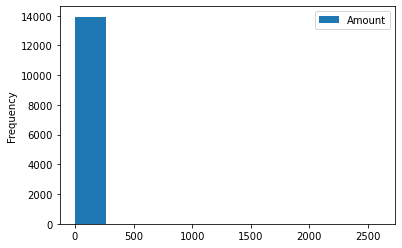

In [13]:
df_set_electronics.plot(x='cluster_id',y='Amount',kind='hist')

In [14]:
# filter on clusters with more entries to get information, here are still 20k clusters left
df_5_electronics=df_set_electronics[df_set_electronics['Amount']>5]
df_5_electronics

,cluster_id,Amount
0,419,6
4,985,14
6,1040,21
9,1922,6
11,2172,6
...,...,...
103926,79871460,6
104132,80071710,6
104156,80097153,60
104157,80097161,37


In [15]:
df_5_electronics.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,2172.0,15.0,67.0,6.0,7.0,8.0,12.0,2600.0


<AxesSubplot:ylabel='Frequency'>

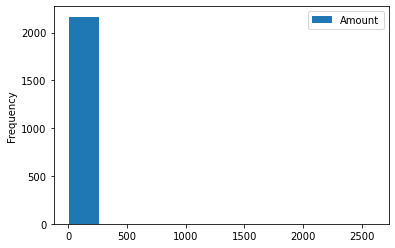

In [16]:
df_5_electronics.plot(x='cluster_id',y='Amount',kind='hist')

In [17]:
df_15_electronics=df_set_electronics[df_set_electronics['Amount']>15]
df_15_electronics

,cluster_id,Amount
6,1040,21
25,6076,19
26,6443,25
28,6505,16
29,6690,20
...,...,...
100248,76869317,60
101968,78260404,80
103569,79512161,16
104156,80097153,60


In [18]:
df_15_electronics.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,337.0,52.0,164.0,16.0,18.0,26.0,52.0,2600.0


<AxesSubplot:ylabel='Frequency'>

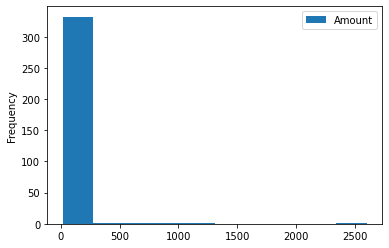

In [19]:
df_15_electronics.plot(x='cluster_id',y='Amount',kind='hist')

In [20]:
df_25_electronics=df_set_electronics[df_set_electronics['Amount']>25]
df_25_electronics

,cluster_id,Amount
113,18640,49
167,28307,36
223,37409,28
257,45122,26
507,96277,268
...,...,...
100247,76869259,43
100248,76869317,60
101968,78260404,80
104156,80097153,60


In [21]:
df_25_electronics.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,171.0,84.0,227.0,26.0,36.0,51.0,63.0,2600.0


<AxesSubplot:ylabel='Frequency'>

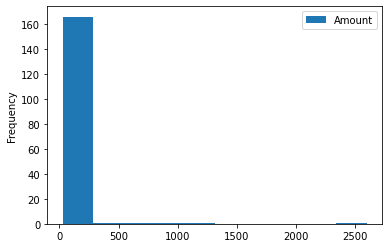

In [22]:
df_25_electronics.plot(x='cluster_id',y='Amount',kind='hist')

In [23]:
#merge brand name to cluster amount
df_cluster_brand = df_15_electronics[df_15_electronics['Amount']<400].merge(df_joined_electronics.dropna()[['cluster_id','brand']].drop_duplicates('cluster_id', keep='last'), left_on=['cluster_id'], right_on = ['cluster_id'], how='left')
df_cluster_brand

,cluster_id,Amount,brand
0,1040,21,nikon
1,6076,19,canon
2,6443,25,canon
3,6505,16,apple
4,6690,20,cisco
...,...,...,...
328,76869317,60,samsung
329,78260404,80,samsung
330,79512161,16,xiaomi
331,80097153,60,samsung


In [24]:
#get the top clusters per brand
df_top_clusters = df_cluster_brand.sort_values(['Amount'], ascending=False).drop_duplicates(subset=["brand"], keep="first")
df_top_clusters

,cluster_id,Amount,brand
41,184777,314,sony
158,1566090,177,canon
219,4494482,83,samsung
189,2456244,55,nikon
80,491900,38,apple
10,28307,36,hp
110,835420,30,amd
43,197396,30,intel
200,2848082,29,asus
7,14418,25,panasonic


In [25]:
pd.set_option('display.max_colwidth', None)

In [82]:
df_joined_electronics[(df_joined_electronics['cluster_id']==1566090)]

,cluster_id,url,row_id,table_id,Valid,brand,product_name
105918,1566090,https://www.scottsbikes.com/product/park-tool-chain-wear-indicator-222236-1.htm,222,Product_scottsbikes.com_September2020.json.gz,1,None,park-tool-chain-wear-indicator-222236-1.htm
541872,1566090,https://www.bigshark.com/product/park-tool-chain-wear-indicator-222236-1.htm,2221,Product_bigshark.com_September2020.json.gz,1,None,park-tool-chain-wear-indicator-222236-1.htm
968763,1566090,https://avcstore.com/products/canon-mt-26ex-rt-macro-twin-lite,303,Product_avcstore.com_September2020.json.gz,1,canon,canon-mt-26ex-rt-macro-twin-lite
1092099,1566090,https://www.trekstoreracine.com/product/park-tool-chain-wear-indicator-222236-1.htm,144,Product_trekstoreracine.com_September2020.json.gz,1,None,park-tool-chain-wear-indicator-222236-1.htm
1631174,1566090,https://www.seabasscycles.co.uk/cc-32-chain-wear-indicator.html,75,Product_seabasscycles.co.uk_September2020.json.gz,1,None,cc-32-chain-wear-indicator.html
...,...,...,...,...,...,...,...
24134777,1566090,https://www.seriouscycles.com/product/park-tool-chain-wear-indicator-222236-1.htm,1717,Product_seriouscycles.com_September2020.json.gz,1,None,park-tool-chain-wear-indicator-222236-1.htm
24382426,1566090,https://www.freewheelbike.com/product/park-tool-chain-wear-indicator-222236-1.htm,625,Product_freewheelbike.com_September2020.json.gz,1,None,park-tool-chain-wear-indicator-222236-1.htm
24398829,1566090,https://www.actionsportsbicyclecenter.com/product/park-tool-chain-wear-indicator-222236-1.htm,462,Product_actionsportsbicyclecenter.com_September2020.json.gz,1,None,park-tool-chain-wear-indicator-222236-1.htm
24427409,1566090,https://www.bikesportbikes.com/product/park-tool-chain-wear-indicator-222236-1.htm,1354,Product_bikesportbikes.com_September2020.json.gz,1,None,park-tool-chain-wear-indicator-222236-1.htm


In [27]:
#get a new column with the product names from the url
df_joined_electronics['product_name'] = df_joined_electronics['url'].apply(lambda row: row.split("/")[-1])

In [28]:
df_joined_electronics

,cluster_id,url,row_id,table_id,Valid,brand,product_name
0,59178314,https://www.cultureindoor.com/796-irrigation-arrosage-tuyau-pe-20mm-semi-rigide-rouleau-100m.html,1561,Product_cultureindoor.com_September2020.json.gz,1,None,796-irrigation-arrosage-tuyau-pe-20mm-semi-rigide-rouleau-100m.html
1,70692685,https://www.culturekings.com/products/new-era-new-era-new-orleans-pelicans-nba-940-a-frame-snapback-black,3893,Product_culturekings.com_September2020.json.gz,1,None,new-era-new-era-new-orleans-pelicans-nba-940-a-frame-snapback-black
2,395606,https://www.culturekings.com/products/new-era-x-nrl-west-tigers-aframe-charcoal-orange,3894,Product_culturekings.com_September2020.json.gz,1,None,new-era-x-nrl-west-tigers-aframe-charcoal-orange
3,3361797,https://www.customizedgirl.com/design/2605608/The+Real+Baseball+Moms,9318,Product_customizedgirl.com_September2020.json.gz,1,None,The+Real+Baseball+Moms
4,235755,https://www.customizedgirl.com/design/2613423/Mentally+Dating+Ronaldo,9319,Product_customizedgirl.com_September2020.json.gz,1,None,Mentally+Dating+Ronaldo
...,...,...,...,...,...,...,...
24687502,8653717,https://shop-list.com/women/utuwa-tatara/sg3232-03,1620,Product_shop-list.com_September2020.json.gz,1,None,sg3232-03
24687503,22258637,https://shop-list.com/women/youmotto/famille-ltm,1621,Product_shop-list.com_September2020.json.gz,1,None,famille-ltm
24687504,41434658,https://shop.agwaycapecod.com/products/019014710959/adult-small-breed-dog-food-5-lb,126,Product_agwaycapecod.com_September2020.json.gz,1,None,adult-small-breed-dog-food-5-lb
24687505,62702145,https://shop.agwaycapecod.com/products/037321455042/ant-killer-dust-3-lbs,127,Product_agwaycapecod.com_September2020.json.gz,1,None,ant-killer-dust-3-lbs


## Cluster statistics for product category clothes

In [29]:
df_grouped_clothes = df_joined_clothes.groupby('cluster_id').count()

In [30]:
# only look at clusters that have at least one brand associated
df_set_clothes = df_grouped_clothes[df_grouped_clothes['brand']>0].reset_index()[['cluster_id','table_id']].rename(columns={'table_id':'Amount'})

In [31]:
# We discard all clusters with less than 2 entries, cause we cannot match anything there, so 1,6 million clusters remain
df_set_clothes=df_set_clothes[df_set_clothes['Amount']>1]
df_set_clothes

,cluster_id,Amount
0,560,2
1,1507,3
2,2420,3
3,2523,2
4,2663,3
...,...,...
105590,80424345,2
105604,80438085,2
105623,80472255,4
105624,80472257,4


In [32]:
df_set_clothes.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,12666.0,3.0,3.0,2.0,2.0,2.0,3.0,289.0


<AxesSubplot:ylabel='Frequency'>

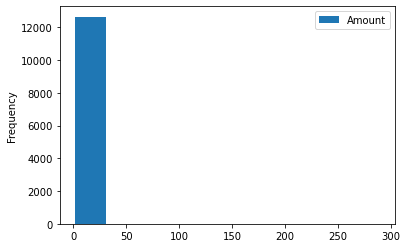

In [33]:
df_set_clothes.plot(x='cluster_id',y='Amount',kind='hist')

In [34]:
# filter on clusters with more entries to get information, here are still 20k clusters left
df_5_clothes=df_set_clothes[df_set_clothes['Amount']>5]
df_5_clothes

,cluster_id,Amount
5,2883,8
11,5310,11
30,12068,7
34,13678,6
47,16573,9
...,...,...
104001,78785962,6
104070,78826947,6
104186,78930130,7
104235,79010737,8


In [35]:
df_5_clothes.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,758.0,9.0,12.0,6.0,6.0,7.0,9.0,289.0


<AxesSubplot:ylabel='Frequency'>

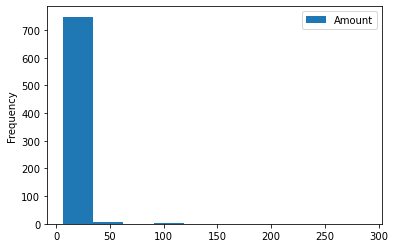

In [36]:
df_5_clothes.plot(x='cluster_id',y='Amount',kind='hist')

In [37]:
df_15_clothes=df_set_clothes[df_set_clothes['Amount']>10]
df_15_clothes

,cluster_id,Amount
11,5310,11
183,58043,12
246,79412,15
279,90549,12
319,102437,14
...,...,...
79674,58592784,19
88341,65475235,11
92112,68554513,13
103333,78110534,13


In [38]:
df_15_clothes.set_index('cluster_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,105.0,21.0,30.0,11.0,12.0,14.0,18.0,289.0


<AxesSubplot:ylabel='Frequency'>

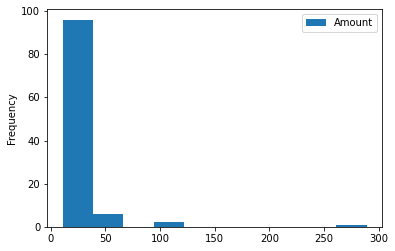

In [39]:
df_15_clothes.plot(x='cluster_id',y='Amount',kind='hist')

In [84]:
df_15_clothes

,cluster_id,Amount
11,5310,11
183,58043,12
246,79412,15
279,90549,12
319,102437,14
...,...,...
79674,58592784,19
88341,65475235,11
92112,68554513,13
103333,78110534,13


In [86]:
#merge brand name to cluster amount
df_cluster_brand_clothes = df_15_clothes[df_15_clothes['Amount']<400].merge(df_joined_clothes.dropna()[['cluster_id','brand']].drop_duplicates('cluster_id', keep='last'), left_on=['cluster_id'], right_on = ['cluster_id'], how='left')
df_cluster_brand_clothes

,cluster_id,Amount,brand
0,5310,11,armani
1,58043,12,burberry
2,79412,15,adidas
3,90549,12,louis vuitton
4,102437,14,chanel
...,...,...,...
100,58592784,19,nike
101,65475235,11,nike
102,68554513,13,nike
103,78110534,13,dolce & gabbana


In [87]:
#get the top clusters per brand
df_top_clusters_clothes = df_cluster_brand_clothes.sort_values(['Amount'], ascending=False).drop_duplicates(subset=["brand"], keep="first")
df_top_clusters_clothes

,cluster_id,Amount,brand
84,5672069,289,gucci
27,527917,110,chanel
62,1524820,95,prada
67,2132296,61,the north face
24,434734,53,adidas
71,2434654,46,louis vuitton
83,3324035,40,oakley
98,58083280,24,nike
78,2825229,24,calvin klein
47,944406,18,dolce & gabbana


In [96]:
df_joined_clothes[(df_joined_clothes['cluster_id']==22374915)]

,cluster_id,url,row_id,table_id,Valid,brand
1126480,22374915,https://06.aplikasionlineshop.com/index.php/product/unero-military-classical-backpack,14,Product_aplikasionlineshop.com_September2020.json.gz,1,None
2128782,22374915,https://pensalo.com/product/unero-military-classical-backpack,16,Product_pensalo.com_September2020.json.gz,1,None
5574153,22374915,https://nelau.com/?product=unero-military-classical-backpack,14,Product_nelau.com_September2020.json.gz,1,None
5848416,22374915,https://pcmundo.com.mx/producto/panasonic-invertr-900l-refrigerator,70,Product_pcmundo.com.mx_September2020.json.gz,1,None
6191685,22374915,https://ebonth.com/product/unero-military-classical-backpack,24,Product_ebonth.com_September2020.json.gz,1,None
6994438,22374915,https://winnershopbd.com/product/unero-military-classical-backpack,22,Product_winnershopbd.com_September2020.json.gz,1,None
8350514,22374915,https://ikotaonline.com/product/unero-military-classical-backpack,15,Product_ikotaonline.com_September2020.json.gz,1,None
8765168,22374915,https://grixbase.com/product/graco-slim-snacker-high-chair-whisk,26,Product_grixbase.com_September2020.json.gz,1,None
9447506,22374915,https://www.digitalshopup.com/product/unero-military-classical-backpack,6,Product_digitalshopup.com_September2020.json.gz,1,None
10271721,22374915,https://ktrworld.com/product/unero-military-classical-backpack,78,Product_ktrworld.com_September2020.json.gz,1,None


In [98]:
df_large[df_large['cluster_id']==22374915]

,cluster_id,url,row_id,table_id,Valid
1126480,22374915,https://06.aplikasionlineshop.com/index.php/product/unero-military-classical-backpack,14,Product_aplikasionlineshop.com_September2020.json.gz,1
2128782,22374915,https://pensalo.com/product/unero-military-classical-backpack,16,Product_pensalo.com_September2020.json.gz,1
5574153,22374915,https://nelau.com/?product=unero-military-classical-backpack,14,Product_nelau.com_September2020.json.gz,1
5848416,22374915,https://pcmundo.com.mx/producto/panasonic-invertr-900l-refrigerator,70,Product_pcmundo.com.mx_September2020.json.gz,1
6191685,22374915,https://ebonth.com/product/unero-military-classical-backpack,24,Product_ebonth.com_September2020.json.gz,1
6994438,22374915,https://winnershopbd.com/product/unero-military-classical-backpack,22,Product_winnershopbd.com_September2020.json.gz,1
8350514,22374915,https://ikotaonline.com/product/unero-military-classical-backpack,15,Product_ikotaonline.com_September2020.json.gz,1
8765168,22374915,https://grixbase.com/product/graco-slim-snacker-high-chair-whisk,26,Product_grixbase.com_September2020.json.gz,1
9447506,22374915,https://www.digitalshopup.com/product/unero-military-classical-backpack,6,Product_digitalshopup.com_September2020.json.gz,1
10271721,22374915,https://ktrworld.com/product/unero-military-classical-backpack,78,Product_ktrworld.com_September2020.json.gz,1


## Get information about the cluster distribution per table to get a first glance at which tables for which clusters have an overlap to get good training data

#### Have at first a look at electronic products

In [40]:
df_joined_electronics

,cluster_id,url,row_id,table_id,Valid,brand,product_name
0,59178314,https://www.cultureindoor.com/796-irrigation-arrosage-tuyau-pe-20mm-semi-rigide-rouleau-100m.html,1561,Product_cultureindoor.com_September2020.json.gz,1,None,796-irrigation-arrosage-tuyau-pe-20mm-semi-rigide-rouleau-100m.html
1,70692685,https://www.culturekings.com/products/new-era-new-era-new-orleans-pelicans-nba-940-a-frame-snapback-black,3893,Product_culturekings.com_September2020.json.gz,1,None,new-era-new-era-new-orleans-pelicans-nba-940-a-frame-snapback-black
2,395606,https://www.culturekings.com/products/new-era-x-nrl-west-tigers-aframe-charcoal-orange,3894,Product_culturekings.com_September2020.json.gz,1,None,new-era-x-nrl-west-tigers-aframe-charcoal-orange
3,3361797,https://www.customizedgirl.com/design/2605608/The+Real+Baseball+Moms,9318,Product_customizedgirl.com_September2020.json.gz,1,None,The+Real+Baseball+Moms
4,235755,https://www.customizedgirl.com/design/2613423/Mentally+Dating+Ronaldo,9319,Product_customizedgirl.com_September2020.json.gz,1,None,Mentally+Dating+Ronaldo
...,...,...,...,...,...,...,...
24687502,8653717,https://shop-list.com/women/utuwa-tatara/sg3232-03,1620,Product_shop-list.com_September2020.json.gz,1,None,sg3232-03
24687503,22258637,https://shop-list.com/women/youmotto/famille-ltm,1621,Product_shop-list.com_September2020.json.gz,1,None,famille-ltm
24687504,41434658,https://shop.agwaycapecod.com/products/019014710959/adult-small-breed-dog-food-5-lb,126,Product_agwaycapecod.com_September2020.json.gz,1,None,adult-small-breed-dog-food-5-lb
24687505,62702145,https://shop.agwaycapecod.com/products/037321455042/ant-killer-dust-3-lbs,127,Product_agwaycapecod.com_September2020.json.gz,1,None,ant-killer-dust-3-lbs


In [41]:
df_grouped_electronics_tables = df_joined_electronics.groupby('table_id').count()

In [42]:
# only look at clusters that have at least one brand associated
df_set_electronics_tables = df_grouped_electronics_tables[df_grouped_electronics_tables['brand']>0].reset_index()[['cluster_id','table_id']].rename(columns={'cluster_id':'Amount'})

In [43]:
df_set_electronics_tables

,Amount,table_id
0,30,Product_07magaza.com_September2020.json.gz
1,847,Product_07mua.com_September2020.json.gz
2,53,Product_100outlets.com_September2020.json.gz
3,127,Product_101farmacias.com_September2020.json.gz
4,50,Product_10ngah.com_September2020.json.gz
...,...,...
3856,8251,Product_zoro.com_September2020.json.gz
3857,607,Product_zotim.com.au_September2020.json.gz
3858,261,Product_zpcinformatica.com_September2020.json.gz
3859,30,Product_zsyst.com_September2020.json.gz


In [44]:
df_set_electronics_tables.set_index('table_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,3861.0,537.0,1240.0,1.0,34.0,137.0,546.0,16287.0


In [45]:
df_75_electronics_tables=df_set_electronics_tables[df_set_electronics_tables['Amount']>75]
df_75_electronics_tables

,Amount,table_id
1,847,Product_07mua.com_September2020.json.gz
3,127,Product_101farmacias.com_September2020.json.gz
5,982,Product_110220volts.com_September2020.json.gz
6,202,Product_1234oo7.com_September2020.json.gz
7,161,Product_123disposables.com_September2020.json.gz
...,...,...
3855,712,Product_zooscape.com_September2020.json.gz
3856,8251,Product_zoro.com_September2020.json.gz
3857,607,Product_zotim.com.au_September2020.json.gz
3858,261,Product_zpcinformatica.com_September2020.json.gz


In [46]:
df_75_electronics_tables.set_index('table_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,2332.0,869.0,1505.0,76.0,181.0,414.0,889.0,16287.0


<AxesSubplot:ylabel='Frequency'>

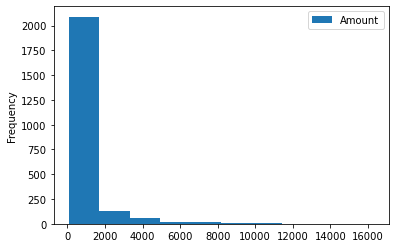

In [47]:
df_75_electronics_tables.plot(x='table_id',y='Amount',kind='hist')

In [48]:
df_150_electronics_tables=df_set_electronics_tables[df_set_electronics_tables['Amount']>150]
df_150_electronics_tables

,Amount,table_id
1,847,Product_07mua.com_September2020.json.gz
5,982,Product_110220volts.com_September2020.json.gz
6,202,Product_1234oo7.com_September2020.json.gz
7,161,Product_123disposables.com_September2020.json.gz
8,397,Product_123securityproducts.com_September2020.json.gz
...,...,...
3855,712,Product_zooscape.com_September2020.json.gz
3856,8251,Product_zoro.com_September2020.json.gz
3857,607,Product_zotim.com.au_September2020.json.gz
3858,261,Product_zpcinformatica.com_September2020.json.gz


In [49]:
df_150_electronics_tables.set_index('table_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,1881.0,1052.0,1624.0,151.0,309.0,567.0,982.0,16287.0


<AxesSubplot:ylabel='Frequency'>

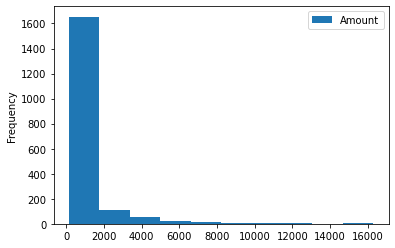

In [50]:
df_150_electronics_tables.plot(x='table_id',y='Amount',kind='hist')

#### Have a look at clothes

In [51]:
df_joined_clothes

,cluster_id,url,row_id,table_id,Valid,brand
0,59178314,https://www.cultureindoor.com/796-irrigation-arrosage-tuyau-pe-20mm-semi-rigide-rouleau-100m.html,1561,Product_cultureindoor.com_September2020.json.gz,1,None
1,70692685,https://www.culturekings.com/products/new-era-new-era-new-orleans-pelicans-nba-940-a-frame-snapback-black,3893,Product_culturekings.com_September2020.json.gz,1,None
2,395606,https://www.culturekings.com/products/new-era-x-nrl-west-tigers-aframe-charcoal-orange,3894,Product_culturekings.com_September2020.json.gz,1,None
3,3361797,https://www.customizedgirl.com/design/2605608/The+Real+Baseball+Moms,9318,Product_customizedgirl.com_September2020.json.gz,1,None
4,235755,https://www.customizedgirl.com/design/2613423/Mentally+Dating+Ronaldo,9319,Product_customizedgirl.com_September2020.json.gz,1,None
...,...,...,...,...,...,...
24687502,8653717,https://shop-list.com/women/utuwa-tatara/sg3232-03,1620,Product_shop-list.com_September2020.json.gz,1,None
24687503,22258637,https://shop-list.com/women/youmotto/famille-ltm,1621,Product_shop-list.com_September2020.json.gz,1,None
24687504,41434658,https://shop.agwaycapecod.com/products/019014710959/adult-small-breed-dog-food-5-lb,126,Product_agwaycapecod.com_September2020.json.gz,1,None
24687505,62702145,https://shop.agwaycapecod.com/products/037321455042/ant-killer-dust-3-lbs,127,Product_agwaycapecod.com_September2020.json.gz,1,None


In [52]:
df_grouped_clothes_tables = df_joined_clothes.groupby('table_id').count()

In [53]:
# only look at clusters that have at least one brand associated
df_set_clothes_tables = df_grouped_clothes_tables[df_grouped_clothes_tables['brand']>0].reset_index()[['cluster_id','table_id']].rename(columns={'cluster_id':'Amount'})

In [54]:
df_set_clothes_tables

,Amount,table_id
0,89,Product_1000drawings.org_September2020.json.gz
1,458,Product_1000tees.com_September2020.json.gz
2,53,Product_100outlets.com_September2020.json.gz
3,1090,Product_18montrose.com_September2020.json.gz
4,207,Product_1stmx.co.uk_September2020.json.gz
...,...,...
2452,8,Product_zipjosh.com_September2020.json.gz
2453,110,Product_zodee.com.au_September2020.json.gz
2454,1189,Product_zonnebrillen.com_September2020.json.gz
2455,208,Product_zorch.com_September2020.json.gz


In [55]:
df_set_clothes_tables.set_index('table_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,2457.0,558.0,1115.0,1.0,54.0,211.0,633.0,16496.0


In [56]:
df_75_clothes_tables=df_set_clothes_tables[df_set_clothes_tables['Amount']>75]
df_75_clothes_tables

,Amount,table_id
0,89,Product_1000drawings.org_September2020.json.gz
1,458,Product_1000tees.com_September2020.json.gz
3,1090,Product_18montrose.com_September2020.json.gz
4,207,Product_1stmx.co.uk_September2020.json.gz
7,204,Product_2020brands.com_September2020.json.gz
...,...,...
2451,388,Product_zeynshoes.com.tr_September2020.json.gz
2453,110,Product_zodee.com.au_September2020.json.gz
2454,1189,Product_zonnebrillen.com_September2020.json.gz
2455,208,Product_zorch.com_September2020.json.gz


In [57]:
df_75_clothes_tables.set_index('table_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,1711.0,787.0,1270.0,76.0,192.0,427.0,842.0,16496.0


<AxesSubplot:ylabel='Frequency'>

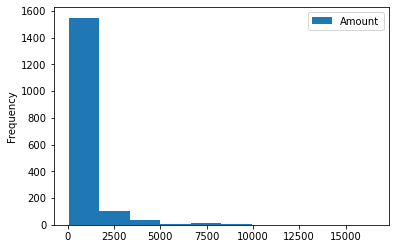

In [58]:
df_75_clothes_tables.plot(x='table_id',y='Amount',kind='hist')

In [59]:
df_150_clothes_tables=df_set_clothes_tables[df_set_clothes_tables['Amount']>150]
df_150_clothes_tables

,Amount,table_id
1,458,Product_1000tees.com_September2020.json.gz
3,1090,Product_18montrose.com_September2020.json.gz
4,207,Product_1stmx.co.uk_September2020.json.gz
7,204,Product_2020brands.com_September2020.json.gz
11,508,Product_24-7grp.com_September2020.json.gz
...,...,...
2449,666,Product_zeeandco.co.uk_September2020.json.gz
2451,388,Product_zeynshoes.com.tr_September2020.json.gz
2454,1189,Product_zonnebrillen.com_September2020.json.gz
2455,208,Product_zorch.com_September2020.json.gz


In [60]:
df_150_clothes_tables.set_index('table_id').describe().T.round()

,count,mean,std,min,25%,50%,75%,max
Amount,1384.0,947.0,1363.0,151.0,308.0,570.0,947.0,16496.0


<AxesSubplot:ylabel='Frequency'>

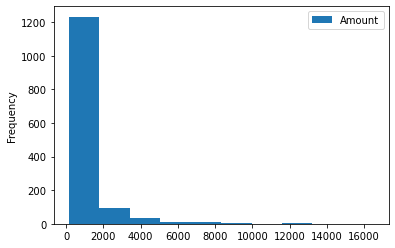

In [61]:
df_150_clothes_tables.plot(x='table_id',y='Amount',kind='hist')

# Get information about which tables and which clusters have the highest overlap

In [62]:
df_joined_electronics

,cluster_id,url,row_id,table_id,Valid,brand,product_name
0,59178314,https://www.cultureindoor.com/796-irrigation-arrosage-tuyau-pe-20mm-semi-rigide-rouleau-100m.html,1561,Product_cultureindoor.com_September2020.json.gz,1,None,796-irrigation-arrosage-tuyau-pe-20mm-semi-rigide-rouleau-100m.html
1,70692685,https://www.culturekings.com/products/new-era-new-era-new-orleans-pelicans-nba-940-a-frame-snapback-black,3893,Product_culturekings.com_September2020.json.gz,1,None,new-era-new-era-new-orleans-pelicans-nba-940-a-frame-snapback-black
2,395606,https://www.culturekings.com/products/new-era-x-nrl-west-tigers-aframe-charcoal-orange,3894,Product_culturekings.com_September2020.json.gz,1,None,new-era-x-nrl-west-tigers-aframe-charcoal-orange
3,3361797,https://www.customizedgirl.com/design/2605608/The+Real+Baseball+Moms,9318,Product_customizedgirl.com_September2020.json.gz,1,None,The+Real+Baseball+Moms
4,235755,https://www.customizedgirl.com/design/2613423/Mentally+Dating+Ronaldo,9319,Product_customizedgirl.com_September2020.json.gz,1,None,Mentally+Dating+Ronaldo
...,...,...,...,...,...,...,...
24687502,8653717,https://shop-list.com/women/utuwa-tatara/sg3232-03,1620,Product_shop-list.com_September2020.json.gz,1,None,sg3232-03
24687503,22258637,https://shop-list.com/women/youmotto/famille-ltm,1621,Product_shop-list.com_September2020.json.gz,1,None,famille-ltm
24687504,41434658,https://shop.agwaycapecod.com/products/019014710959/adult-small-breed-dog-food-5-lb,126,Product_agwaycapecod.com_September2020.json.gz,1,None,adult-small-breed-dog-food-5-lb
24687505,62702145,https://shop.agwaycapecod.com/products/037321455042/ant-killer-dust-3-lbs,127,Product_agwaycapecod.com_September2020.json.gz,1,None,ant-killer-dust-3-lbs


In [63]:
# get information about counts of clusters per table
df_electronics_table_id = df_joined_electronics.groupby('table_id').count().reset_index().rename(columns={'brand':'brand_table','cluster_id':'cluster_count'}).drop(columns = ['url','row_id','Valid'])

In [64]:
# get information about counts of tables per cluster
df_electronics_cluster_id = df_joined_electronics.groupby('cluster_id').count().reset_index().rename(columns={'brand':'brand_cluster','table_id':'table_count'}).drop(columns = ['url','row_id','Valid'])

In [65]:
#join the two informations
df_enriched = df_joined_electronics.merge(df_electronics_table_id, how='left',left_on=['table_id'],right_on=['table_id']).merge(df_electronics_cluster_id, how='left',left_on=['cluster_id'],right_on=['cluster_id'])

In [66]:
# select only the entries, where we have at least one brand in table counts and cluster counts
df_enriched = df_enriched[(df_enriched['brand_table']>0) & (df_enriched['brand_cluster']>0)]

In [67]:
df_enriched[df_enriched['table_count']>10].dropna().sort_values(by=['table_id','cluster_id'])

,cluster_id,url,row_id,table_id,Valid,brand,product_name_x,cluster_count,brand_table,product_name_y,table_count,brand_cluster,product_name
1039873,224590,https://www.110220volts.com/sony-bdp-s1700-region-free-blu-ray-player-with-100-240-volt-50-60-hz.html,1550,Product_110220volts.com_September2020.json.gz,1,sony,sony-bdp-s1700-region-free-blu-ray-player-with-100-240-volt-50-60-hz.html,982,500,982,16,6,16
13163537,289703,https://www.247inktoner.com/genuine-oem-canon-pgi-72pbk-ink-cartridge,1056,Product_247inktoner.com_September2020.json.gz,1,canon,genuine-oem-canon-pgi-72pbk-ink-cartridge,837,265,837,12,7,12
16303144,23343,https://www.4clik.com/photo-video/objectifs/id=905049/sony-e-70-350mm-f4.5-6.3-g-oss,233,Product_4clik.com_September2020.json.gz,1,sony,sony-e-70-350mm-f4.5-6.3-g-oss,977,101,977,18,6,18
14736718,201669,https://www.4clik.com/smartphone/id=SMTPH9915/xiaomi-redmi-note-8-pro-double-sim-64go-4g,1737,Product_4clik.com_September2020.json.gz,1,xiaomi,xiaomi-redmi-note-8-pro-double-sim-64go-4g,977,101,977,16,5,16
3132861,206844,https://www.4clik.com/informatique/imprimantes/id=B58435/hp-laserjet-pro-m404dn,893,Product_4clik.com_September2020.json.gz,1,hp,hp-laserjet-pro-m404dn,977,101,977,12,3,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
640506,262855,https://www.zotim.com.au/shop/sam-con-mlt-d116l,564,Product_zotim.com.au_September2020.json.gz,1,samsung,sam-con-mlt-d116l,607,86,607,11,5,11
7360491,660698,https://www.zotim.com.au/shop/sam-con-clt-c406s,122,Product_zotim.com.au_September2020.json.gz,1,samsung,sam-con-clt-c406s,607,86,607,15,4,15
13531632,855653,https://www.zotim.com.au/shop/can-con-cli526bk,493,Product_zotim.com.au_September2020.json.gz,1,canon,can-con-cli526bk,607,86,607,12,1,12
12836186,2593008,https://www.zotim.com.au/shop/sam-con-clt-c504s,990,Product_zotim.com.au_September2020.json.gz,1,samsung,sam-con-clt-c504s,607,86,607,11,3,11
